In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Download dei dati

In [ ]:
%%shell
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/fenditura1.txt > fenditura1.txt
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/fenditure3.txt > fenditure3.txt
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/capello.txt > capello.txt
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/filo2.txt > filo2.txt
curl -l https://raw.githubusercontent.com/albertos-2002/SF2/main/ottica_fisica/raw_data/fondolaserspento.txt > fondolaserspento.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69899  100 69899    0     0   650k      0 --:--:-- --:--:-- --:--:--  650k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 70615  100 70615    0     0   599k      0 --:--:-- --:--:-- --:--:--  604k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45008  100 45008    0     0   305k      0 --:--:-- --:--:-- --:--:--  305k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 44753  100 44753    0     0   214k      0 --:--:-- --:--:-- --:--:--  214k
  % Total    % Received % Xferd  Average Speed   Tim

Definiamo le funzioni necessarie

In [ ]:
#definiamo la funzione parabola
def parabola_fit(x, a,b,c):
  return a*(x**2) + b*x +c
#definiamo l'errore sulle y
sigma_1f = 10
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#Definiamo la funzione vertice
def vertice_parabola(b, a):
  return (-b) / (2*a)
#Definiamo la funzione sigma vertice
def sigma_vertice_parabola(vertice, b, sigma_b, a, sigma_a): #per passare la sigma del parametro bisogna passare la radice della diagonale della matrice di covarianza
  parametro_vertice = ( (-b) / (2*a) )**2
  parametro_err1 = ( sigma_b / b )**2
  parametro_err2 = ( 2*sigma_a / a )**2
  #parametro_cov = ( 2*cov ) / ( b*a )
  parametro_errs = parametro_err1 + parametro_err2
  return math.sqrt( parametro_vertice*parametro_errs )
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#costante di conversione pm -> rad
pm_rad = 1.9 * pow(10,-5)
sigma_pm_rad = 1.4 * pow(10,-7)
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#definiamo la funzione di una retta
def retta_interpolante(x, a, b):
  return a + (np.asarray(b)*x)
#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
lunghezza_donda = 670 #nm
sigma_lunghezza_donda = 5 #nm

#1 fenditura

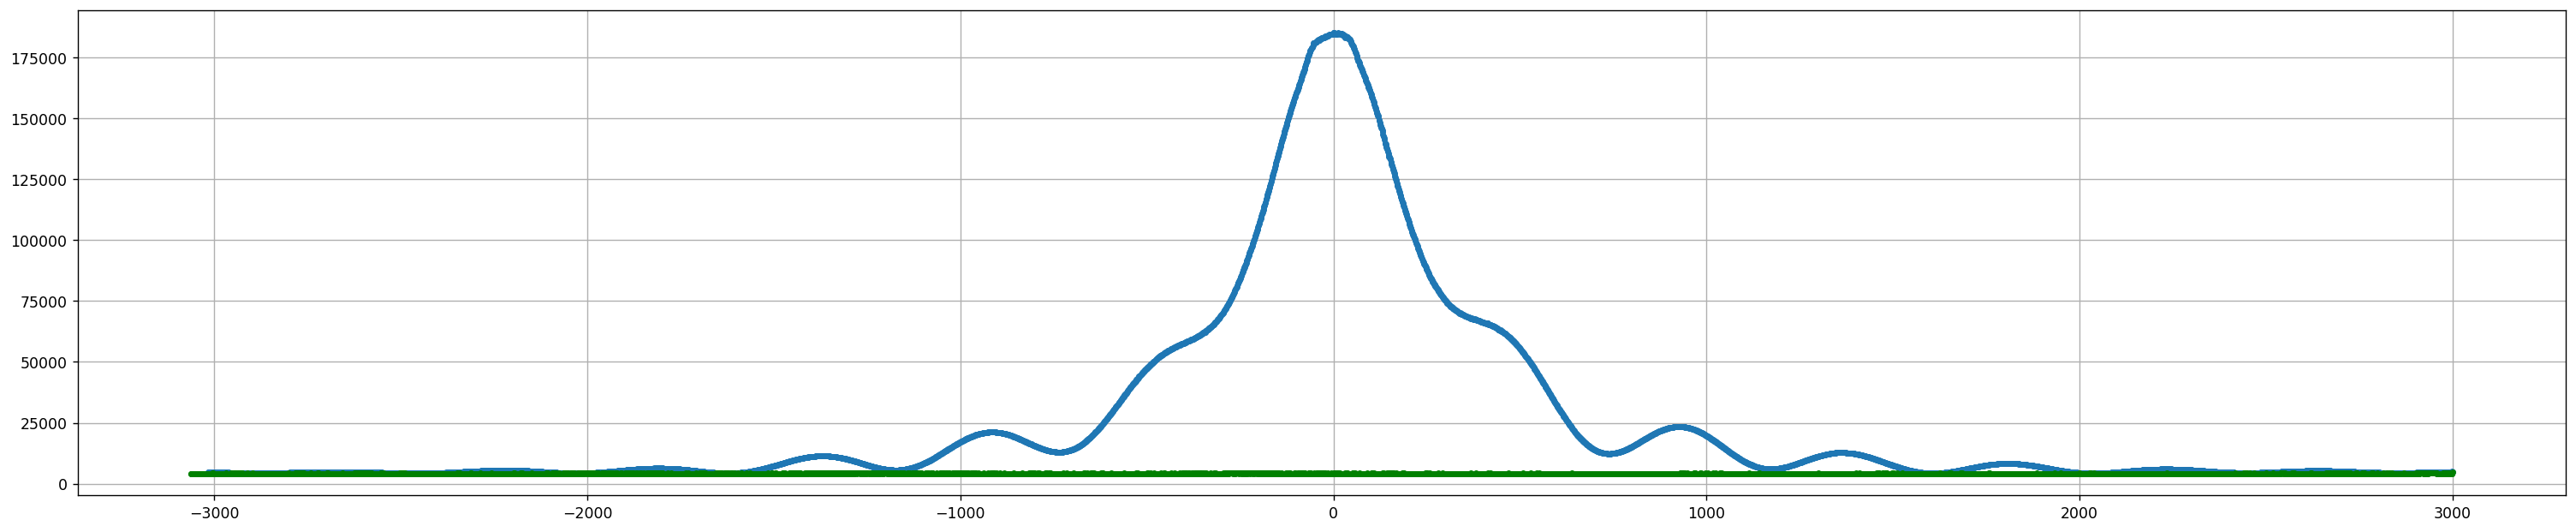

In [ ]:
#carichiamo i dati
pm_1f, int_1f = np.loadtxt("fenditura1.txt", delimiter=",",unpack="True")

#carichiamo il fondo
pm_fondo, int_fondo = np.loadtxt("fondolaserspento.txt", delimiter=",",unpack="True")

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_1f, int_1f, linestyle="", marker=".")
plt.plot(pm_fondo, int_fondo, linestyle="", marker=".", color="green")
plt.grid()

estraiamo dei range per i minimi, in modo tale da utilizzare un fit parabolico

utilizziamo una numerazione crescente a partire dal range più negativo e proseguendo in avavnti


Text(0.5, 1.0, 'f10')

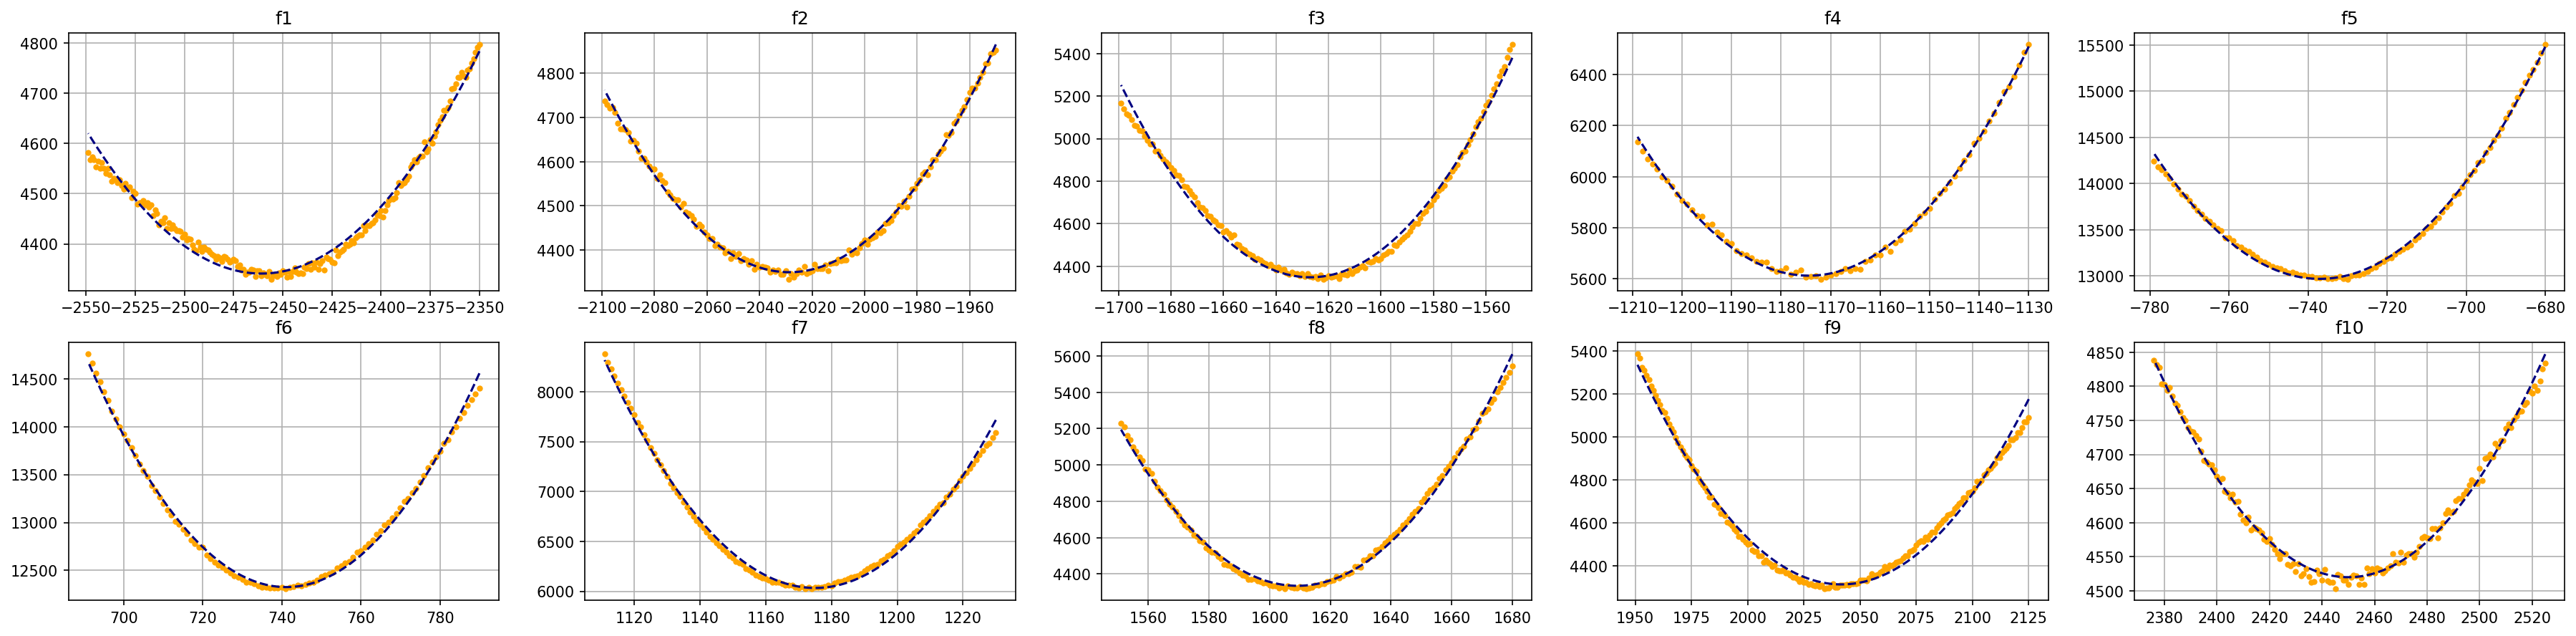

In [ ]:
plt.figure(dpi=150, figsize=(30,7))
#5  #-2550 -> -2350
pm_min_cinque = pm_1f[3000+680:3000+780]
int_min_cinque = int_1f[3000+680:3000+780]
f5 = plt.subplot(2,5,5)
f5.plot(pm_min_cinque, int_min_cinque, linestyle="", marker=".", color="orange")
f5.plot(pm_min_cinque, parabola_fit(pm_min_cinque, a5_1f, b5_1f, c5_1f), linestyle="--", marker="", color="navy")
f5.grid()
f5.set_title("f5")
#4   #-2100 -> -1950
pm_min_quattro = pm_1f[3000+1130:3000+1210]
int_min_quattro = int_1f[3000+1130:3000+1210]
f4 = plt.subplot(2,5,4)
f4.plot(pm_min_quattro, int_min_quattro, linestyle="", marker=".", color="orange")
f4.plot(pm_min_quattro, parabola_fit(pm_min_quattro, a4_1f, b4_1f, c4_1f), linestyle="--", marker="", color="navy")
f4.grid()
f4.set_title("f4")
#3  #-1700 -> -1550
pm_min_tre = pm_1f[3000+1550:3000+1700]
int_min_tre = int_1f[3000+1550:3000+1700]
f3 = plt.subplot(2,5,3)
f3.plot(pm_min_tre, int_min_tre, linestyle="", marker=".", color="orange")
f3.plot(pm_min_tre, parabola_fit(pm_min_tre, a3_1f, b3_1f, c3_1f), linestyle="--", marker="", color="navy")
f3.grid()
f3.set_title("f3")
#2  #-1210 -> -1130
pm_min_due = pm_1f[3000+1950:3000+2100]
int_min_due = int_1f[3000+1950:3000+2100]
f2 = plt.subplot(2,5,2)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange")
f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_1f, b2_1f, c2_1f), linestyle="--", marker="", color="navy")
f2.grid()
f2.set_title("f2")
#1  #-780 -> -680
pm_min_uno = pm_1f[3000+2350:3000+2550]
int_min_uno = int_1f[3000+2350:3000+2550]
f1 = plt.subplot(2,5,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange")
f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_1f, b1_1f, c1_1f), linestyle="--", marker="", color="navy")
f1.grid()
f1.set_title("f1")
#6  #690 -> 790
pm_min_sei = pm_1f[3000-790:3000-690]
int_min_sei = int_1f[3000-790:3000-690]
f6 = plt.subplot(2,5,6)
f6.plot(pm_min_sei, int_min_sei, linestyle="", marker=".", color="orange")
f6.plot(pm_min_sei, parabola_fit(pm_min_sei, a6_1f, b6_1f, c6_1f), linestyle="--", marker="", color="navy")
f6.grid()
f6.set_title("f6")
#7  #1110 -> 1230
pm_min_sette = pm_1f[3000-1230:3000-1110]
int_min_sette = int_1f[3000-1230:3000-1110]
f7 = plt.subplot(2,5,7)
f7.plot(pm_min_sette, int_min_sette, linestyle="", marker=".", color="orange")
f7.plot(pm_min_sette, parabola_fit(pm_min_sette, a7_1f, b7_1f, c7_1f), linestyle="--", marker="", color="navy")
f7.grid()
f7.set_title("f7")
#8  #1550 -> 1700
pm_min_otto = pm_1f[3000-1680:3000-1550]
int_min_otto = int_1f[3000-1680:3000-1550]
f8 = plt.subplot(2,5,8)
f8.plot(pm_min_otto, int_min_otto, linestyle="", marker=".", color="orange")
f8.plot(pm_min_otto, parabola_fit(pm_min_otto, a8_1f, b8_1f, c8_1f), linestyle="--", marker="", color="navy")
f8.grid()
f8.set_title("f8")
#9  #1950 -> 2150
pm_min_nove = pm_1f[3000-2125:3000-1950]
int_min_nove = int_1f[3000-2125:3000-1950]
f9 = plt.subplot(2,5,9)
f9.plot(pm_min_nove, int_min_nove, linestyle="", marker=".", color="orange")
f9.plot(pm_min_nove, parabola_fit(pm_min_nove, a9_1f, b9_1f, c9_1f), linestyle="--", marker="", color="navy")
f9.grid()
f9.set_title("f9")
#10  #2350 -> 2600 
pm_min_dieci = pm_1f[3000-2525:3000-2375]
int_min_dieci = int_1f[3000-2525:3000-2375]
f10 =plt.subplot(2,5,10)
f10.plot(pm_min_dieci, int_min_dieci, linestyle="", marker=".", color="orange")
f10.plot(pm_min_dieci, parabola_fit(pm_min_dieci, a10_1f, b10_1f, c10_1f), linestyle="--", marker="", color="navy")
f10.grid()
f10.set_title("f10")

Procediamo con il fit parabolico per determinare i minimi

In [ ]:
#minimo 1
par_1_1f, cov_1_1f = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_1f)
print("Matrice covarianza 1 \n", cov_1_1f)
a1_1f, b1_1f, c1_1f = par_1_1f
#minimo 2
par_2_1f, cov_2_1f = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_1f)
print("Matrice covarianza 2 \n", cov_2_1f)
a2_1f, b2_1f, c2_1f = par_2_1f
#minimo 3
par_3_1f, cov_3_1f = curve_fit(parabola_fit, pm_min_tre , int_min_tre , sigma=([sigma_1f]*len(int_min_tre)))
print("Parametri 3 a,b,c \n", par_3_1f)
print("Matrice covarianza 3 \n", cov_3_1f)
a3_1f, b3_1f, c3_1f = par_3_1f
#minimo 4
par_4_1f, cov_4_1f = curve_fit(parabola_fit, pm_min_quattro , int_min_quattro , sigma=([sigma_1f]*len(int_min_quattro)))
print("Parametri 4 a,b,c \n", par_4_1f)
print("Matrice covarianza 4 \n", cov_4_1f)
a4_1f, b4_1f, c4_1f = par_4_1f
#minimo 5
par_5_1f, cov_5_1f = curve_fit(parabola_fit, pm_min_cinque , int_min_cinque , sigma=([sigma_1f]*len(int_min_cinque)))
print("Parametri 5 a,b,c \n", par_5_1f)
print("Matrice covarianza 5 \n", cov_5_1f)
a5_1f, b5_1f, c5_1f = par_5_1f
#minimo 6
par_6_1f, cov_6_1f = curve_fit(parabola_fit, pm_min_sei , int_min_sei , sigma=([sigma_1f]*len(int_min_sei)))
print("Parametri 6 a,b,c \n", par_6_1f)
print("Matrice covarianza 6 \n", cov_6_1f)
a6_1f, b6_1f, c6_1f = par_6_1f
#minimo 7
par_7_1f, cov_7_1f = curve_fit(parabola_fit, pm_min_sette , int_min_sette , sigma=([sigma_1f]*len(int_min_sette)))
print("Parametri 7 a,b,c \n", par_7_1f)
print("Matrice covarianza 7 \n", cov_7_1f)
a7_1f, b7_1f, c7_1f = par_7_1f
#minimo 8
par_8_1f, cov_8_1f = curve_fit(parabola_fit, pm_min_otto , int_min_otto , sigma=([sigma_1f]*len(int_min_otto)))
print("Parametri 8 a,b,c \n", par_8_1f)
print("Matrice covarianza 8 \n", cov_8_1f)
a8_1f, b8_1f, c8_1f = par_8_1f
#minimo 9
par_9_1f, cov_9_1f = curve_fit(parabola_fit, pm_min_nove , int_min_nove , sigma=([sigma_1f]*len(int_min_nove)))
print("Parametri 9 a,b,c \n", par_9_1f)
print("Matrice covarianza 9 \n", cov_9_1f)
a9_1f, b9_1f, c9_1f = par_9_1f
#minimo 10
par_10_1f, cov_10_1f = curve_fit(parabola_fit, pm_min_dieci , int_min_dieci , sigma=([sigma_1f]*len(int_min_dieci)))
print("Parametri 10 a,b,c \n", par_10_1f)
print("Matrice covarianza 10 \n", cov_10_1f)
a10_1f, b10_1f, c10_1f = par_10_1f

Parametri 1 a,b,c 
 [3.59685416e-02 1.77030935e+02 2.22169840e+05]
Matrice covarianza 1 
 [[1.31259870e-07 6.43042115e-04 7.87128329e-01]
 [6.43042115e-04 3.15061337e+00 3.85699906e+03]
 [7.87128329e-01 3.85699906e+03 4.72228718e+06]]
Parametri 2 a,b,c 
 [8.33969836e-02 3.38367740e+02 3.47565536e+05]
Matrice covarianza 2 
 [[1.54693008e-07 6.26351997e-04 6.33734787e-01]
 [6.26351997e-04 2.53633127e+00 2.56646187e+03]
 [6.33734787e-01 2.56646187e+03 2.59718876e+06]]
Parametri 3 a,b,c 
 [1.74155912e-01 5.66692198e+02 4.65343319e+05]
Matrice covarianza 3 
 [[2.19748058e-06 7.13961429e-03 5.79503157e+00]
 [7.13961429e-03 2.31999021e+01 1.88334110e+04]
 [5.79503157e+00 1.88334110e+04 1.52909276e+07]]
Parametri 4 a,b,c 
 [4.54937982e-01 1.06857949e+03 6.33094563e+05]
Matrice covarianza 4 
 [[7.19222185e-06 1.68226069e-02 9.83318404e+00]
 [1.68226069e-02 3.93511443e+01 2.30034040e+04]
 [9.83318404e+00 2.30034040e+04 1.34480957e+07]]
Parametri 5 a,b,c 
 [7.71677992e-01 1.13751880e+03 4.3216786

Facciamo uno zoom vicino al minimo

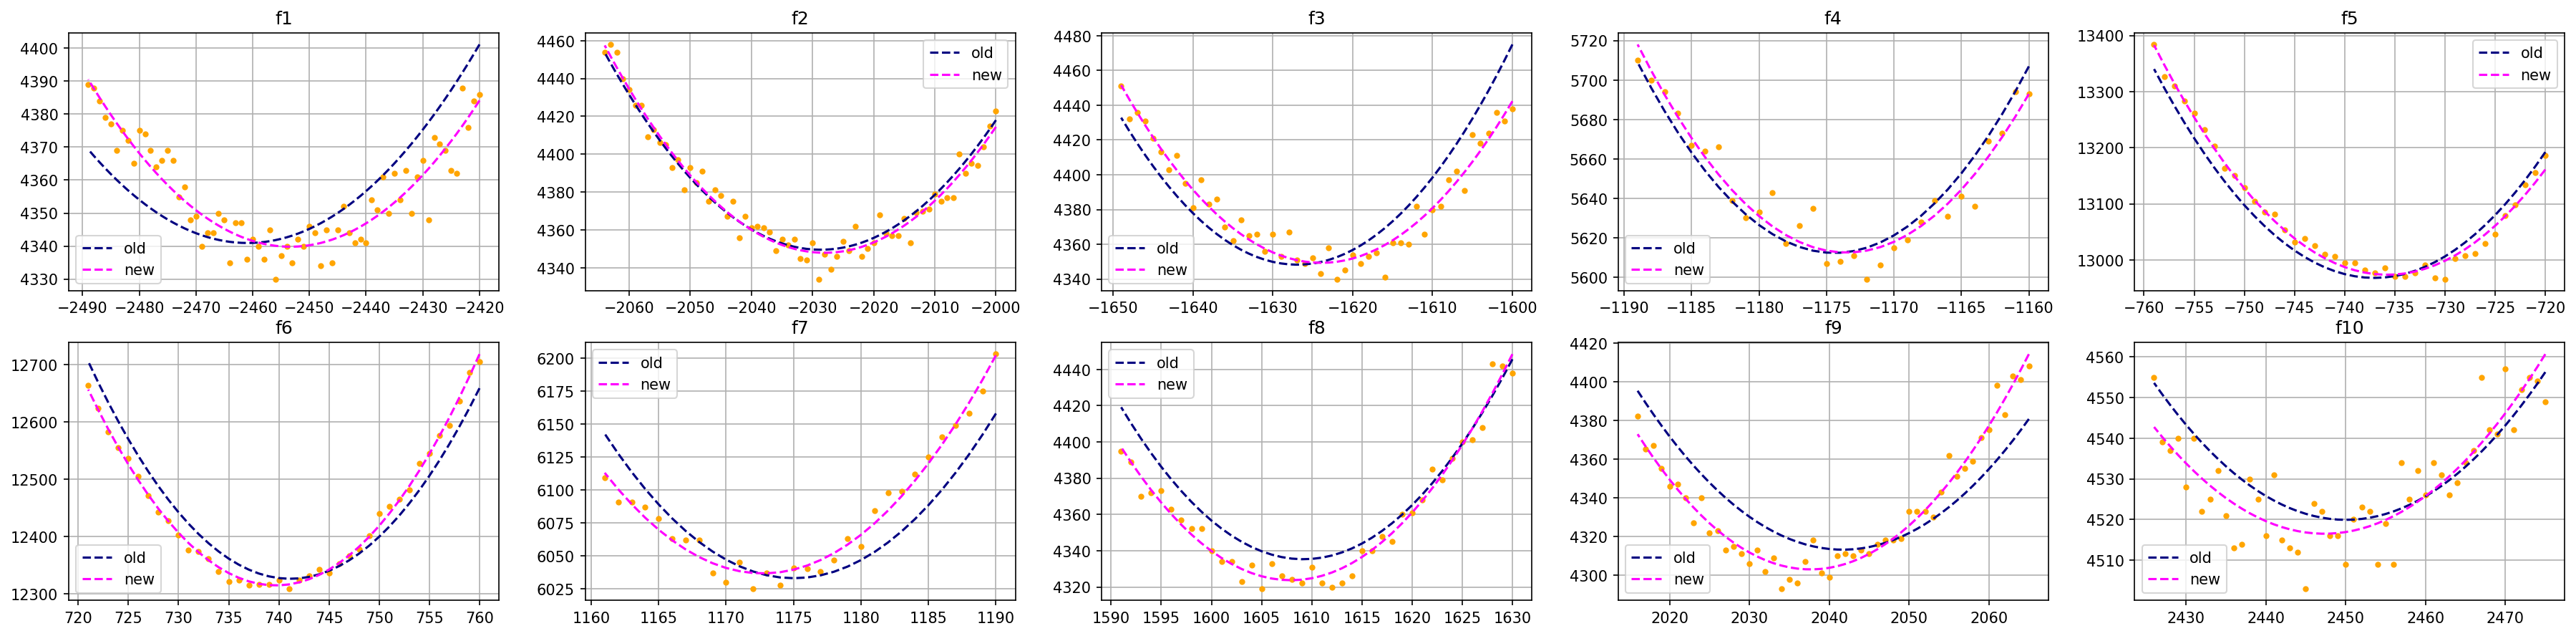

In [ ]:
plt.figure(dpi=150, figsize=(30,7))
#1  #-780 -> -680
pm_min_unoz = pm_1f[3000+2420:3000+2490]
int_min_unoz = int_1f[3000+2420:3000+2490]
f1 = plt.subplot(2,5,1)
f1.plot(pm_min_unoz, int_min_unoz, linestyle="", marker=".", color="orange")
f1.plot(pm_min_unoz, parabola_fit(pm_min_unoz, a1_1f, b1_1f, c1_1f), linestyle="--", marker="", color="navy", label="old")
f1.plot(pm_min_unoz, parabola_fit(pm_min_unoz, a1_1fz, b1_1fz, c1_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f1.grid()
f1.set_title("f1")
f1.legend()
#2  #-1210 -> -1130
pm_min_duez = pm_1f[3000+2000:3000+2065]
int_min_duez = int_1f[3000+2000:3000+2065]
f2 = plt.subplot(2,5,2)
f2.plot(pm_min_duez, int_min_duez, linestyle="", marker=".", color="orange")
f2.plot(pm_min_duez, parabola_fit(pm_min_duez, a2_1f, b2_1f, c2_1f), linestyle="--", marker="", color="navy", label="old")
f2.plot(pm_min_duez, parabola_fit(pm_min_duez, a2_1fz, b2_1fz, c2_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f2.grid()
f2.set_title("f2")
f2.legend()
#3  #-1700 -> -1550
pm_min_trez = pm_1f[3000+1600:3000+1650]
int_min_trez = int_1f[3000+1600:3000+1650]
f3 = plt.subplot(2,5,3)
f3.plot(pm_min_trez, int_min_trez, linestyle="", marker=".", color="orange")
f3.plot(pm_min_trez, parabola_fit(pm_min_trez, a3_1f, b3_1f, c3_1f), linestyle="--", marker="", color="navy", label="old")
f3.plot(pm_min_trez, parabola_fit(pm_min_trez, a3_1fz, b3_1fz, c3_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f3.grid()
f3.set_title("f3")
f3.legend()
#4   #-2100 -> -1950
pm_min_quattroz = pm_1f[3000+1160:3000+1190]
int_min_quattroz = int_1f[3000+1160:3000+1190]
f4 = plt.subplot(2,5,4)
f4.plot(pm_min_quattroz, int_min_quattroz, linestyle="", marker=".", color="orange")
f4.plot(pm_min_quattroz, parabola_fit(pm_min_quattroz, a4_1f, b4_1f, c4_1f), linestyle="--", marker="", color="navy", label="old")
f4.plot(pm_min_quattroz, parabola_fit(pm_min_quattroz, a4_1fz, b4_1fz, c4_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f4.grid()
f4.set_title("f4")
f4.legend()
#5  #-2550 -> -2350
pm_min_cinquez = pm_1f[3000+720:3000+760]
int_min_cinquez = int_1f[3000+720:3000+760]
f5 = plt.subplot(2,5,5)
f5.plot(pm_min_cinquez, int_min_cinquez, linestyle="", marker=".", color="orange")
f5.plot(pm_min_cinquez, parabola_fit(pm_min_cinquez, a5_1f, b5_1f, c5_1f), linestyle="--", marker="", color="navy", label="old")
f5.plot(pm_min_cinquez, parabola_fit(pm_min_cinquez, a5_1fz, b5_1fz, c5_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f5.grid()
f5.set_title("f5")
f5.legend()
#6  #690 -> 790
pm_min_seiz = pm_1f[3000-760:3000-720]
int_min_seiz = int_1f[3000-760:3000-720]
f6 = plt.subplot(2,5,6)
f6.plot(pm_min_seiz, int_min_seiz, linestyle="", marker=".", color="orange")
f6.plot(pm_min_seiz, parabola_fit(pm_min_seiz, a6_1f, b6_1f, c6_1f), linestyle="--", marker="", color="navy", label="old")
f6.plot(pm_min_seiz, parabola_fit(pm_min_seiz, a6_1fz, b6_1fz, c6_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f6.grid()
f6.set_title("f6")
f6.legend()
#7  #1110 -> 1230
pm_min_settez = pm_1f[3000-1190:3000-1160]
int_min_settez = int_1f[3000-1190:3000-1160]
f7 = plt.subplot(2,5,7)
f7.plot(pm_min_settez, int_min_settez, linestyle="", marker=".", color="orange")
f7.plot(pm_min_settez, parabola_fit(pm_min_settez, a7_1f, b7_1f, c7_1f), linestyle="--", marker="", color="navy", label="old")
f7.plot(pm_min_settez, parabola_fit(pm_min_settez, a7_1fz, b7_1fz, c7_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f7.grid()
f7.set_title("f7")
f7.legend()
#8  #1550 -> 1700
pm_min_ottoz = pm_1f[3000-1630:3000-1590]
int_min_ottoz = int_1f[3000-1630:3000-1590]
f8 = plt.subplot(2,5,8)
f8.plot(pm_min_ottoz, int_min_ottoz, linestyle="", marker=".", color="orange")
f8.plot(pm_min_ottoz, parabola_fit(pm_min_ottoz, a8_1f, b8_1f, c8_1f), linestyle="--", marker="", color="navy", label="old")
f8.plot(pm_min_ottoz, parabola_fit(pm_min_ottoz, a8_1fz, b8_1fz, c8_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f8.grid()
f8.set_title("f8")
f8.legend()
#9  #1950 -> 2150
pm_min_novez = pm_1f[3000-2065:3000-2015]
int_min_novez = int_1f[3000-2065:3000-2015]
f9 = plt.subplot(2,5,9)
f9.plot(pm_min_novez, int_min_novez, linestyle="", marker=".", color="orange")
f9.plot(pm_min_novez, parabola_fit(pm_min_novez, a9_1f, b9_1f, c9_1f), linestyle="--", marker="", color="navy", label="old")
f9.plot(pm_min_novez, parabola_fit(pm_min_novez, a9_1fz, b9_1fz, c9_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f9.grid()
f9.set_title("f9")
f9.legend()
#10  #2350 -> 2600 
pm_min_dieciz = pm_1f[3000-2475:3000-2425]
int_min_dieciz = int_1f[3000-2475:3000-2425]
f10 =plt.subplot(2,5,10)
f10.plot(pm_min_dieciz, int_min_dieciz, linestyle="", marker=".", color="orange")
f10.plot(pm_min_dieciz, parabola_fit(pm_min_dieciz, a10_1f, b10_1f, c10_1f), linestyle="--", marker="", color="navy", label="old")
f10.plot(pm_min_dieciz, parabola_fit(pm_min_dieciz, a10_1fz, b10_1fz, c10_1fz), linestyle="--", marker="", color="fuchsia", label="new")
f10.grid()
f10.set_title("f10")
f10.legend()

eseguiamo un fit su questo ristretto numero di punti

In [ ]:
#minimo 1
par_1_1fz, cov_1_1fz = curve_fit(parabola_fit, pm_min_unoz , int_min_unoz , sigma=([sigma_1f]*len(int_min_unoz)))
a1_1fz, b1_1fz, c1_1fz = par_1_1fz
var_a1_1fz = cov_1_1fz[0,0]
var_b1_1fz = cov_1_1fz[1,1]
  #covar_ab1_1fz = cov_1_1fz[1,2]
#minimo 2
par_2_1fz, cov_2_1fz = curve_fit(parabola_fit, pm_min_duez , int_min_duez , sigma=([sigma_1f]*len(int_min_duez)))
a2_1fz, b2_1fz, c2_1fz = par_2_1fz
var_a2_1fz = cov_2_1fz[0,0]
var_b2_1fz = cov_2_1fz[1,1]
  #covar_ab2_1fz = cov_2_1fz[1,2]
#minimo 3
par_3_1fz, cov_3_1fz = curve_fit(parabola_fit, pm_min_trez , int_min_trez , sigma=([sigma_1f]*len(int_min_trez)))
a3_1fz, b3_1fz, c3_1fz = par_3_1fz
var_a3_1fz = cov_3_1fz[0,0]
var_b3_1fz = cov_3_1fz[1,1]
  #covar_ab3_1fz = cov_3_1fz[1,2]
#minimo 4
par_4_1fz, cov_4_1fz = curve_fit(parabola_fit, pm_min_quattroz , int_min_quattroz , sigma=([sigma_1f]*len(int_min_quattroz)))
a4_1fz, b4_1fz, c4_1fz = par_4_1fz
var_a4_1fz = cov_4_1fz[0,0]
var_b4_1fz = cov_4_1fz[1,1]
  #covar_ab4_1fz = cov_4_1fz[1,2]
#minimo 5
par_5_1fz, cov_5_1fz = curve_fit(parabola_fit, pm_min_cinquez , int_min_cinquez , sigma=([sigma_1f]*len(int_min_cinquez)))
a5_1fz, b5_1fz, c5_1fz = par_5_1fz
var_a5_1fz = cov_5_1fz[0,0]
var_b5_1fz = cov_5_1fz[1,1]
  #covar_ab5_1fz = cov_5_1fz[1,2]
#minimo 6
par_6_1fz, cov_6_1fz = curve_fit(parabola_fit, pm_min_seiz , int_min_seiz , sigma=([sigma_1f]*len(int_min_seiz)))
a6_1fz, b6_1fz, c6_1fz = par_6_1fz
var_a6_1fz = cov_6_1fz[0,0]
var_b6_1fz = cov_6_1fz[1,1]
  #covar_ab6_1fz = cov_6_1fz[1,2]
#minimo 7
par_7_1fz, cov_7_1fz = curve_fit(parabola_fit, pm_min_settez , int_min_settez , sigma=([sigma_1f]*len(int_min_settez)))
a7_1fz, b7_1fz, c7_1fz = par_7_1fz
var_a7_1fz = cov_7_1fz[0,0]
var_b7_1fz = cov_7_1fz[1,1]
  #covar_ab7_1fz = cov_7_1fz[1,2]
#minimo 8
par_8_1fz, cov_8_1fz = curve_fit(parabola_fit, pm_min_ottoz , int_min_ottoz , sigma=([sigma_1f]*len(int_min_ottoz)))
a8_1fz, b8_1fz, c8_1fz = par_8_1fz
var_a8_1fz = cov_8_1fz[0,0]
var_b8_1fz = cov_8_1fz[1,1]
  #covar_ab8_1fz = cov_8_1fz[1,2]
#minimo 9
par_9_1fz, cov_9_1fz = curve_fit(parabola_fit, pm_min_novez , int_min_novez , sigma=([sigma_1f]*len(int_min_novez)))
a9_1fz, b9_1fz, c9_1fz = par_9_1fz
var_a9_1fz = cov_9_1fz[0,0]
var_b9_1fz = cov_9_1fz[1,1]
  #covar_ab9_1fz = cov_9_1fz[1,2]
#minimo 10
par_10_1fz, cov_10_1fz = curve_fit(parabola_fit, pm_min_dieciz , int_min_dieciz , sigma=([sigma_1f]*len(int_min_dieciz)))
a10_1fz, b10_1fz, c10_1fz = par_10_1fz
var_a10_1fz = cov_10_1fz[0,0]
var_b10_1fz = cov_10_1fz[1,1]
  #covar_ab10_1fz = cov_10_1fz[1,2]

Calcoliamo il vertice in pm e poi convertiamo lo stesso in angolo ed il seno dello stesso, il possibile errore sistematico che affligge ogni punto verrà poi imputato solo alla pendenza della retta interpolante


In [ ]:
#1
vertice_1_1f = vertice_parabola(b1_1fz, a1_1fz)
sigmav_1_1f = sigma_vertice_parabola(vertice_1_1f, b1_1fz, math.sqrt(var_b1_1fz), a1_1fz, math.sqrt(var_a1_1fz))
#2
vertice_2_1f = vertice_parabola(b2_1fz, a2_1fz)
sigmav_2_1f = sigma_vertice_parabola(vertice_2_1f, b2_1fz, math.sqrt(var_b2_1fz), a2_1fz, math.sqrt(var_a2_1fz))
#3
vertice_3_1f = vertice_parabola(b3_1fz, a3_1fz)
sigmav_3_1f = sigma_vertice_parabola(vertice_3_1f, b3_1fz, math.sqrt(var_b3_1fz), a3_1fz, math.sqrt(var_a3_1fz))
#4
vertice_4_1f = vertice_parabola(b4_1fz, a4_1fz)
sigmav_4_1f = sigma_vertice_parabola(vertice_4_1f, b4_1fz, math.sqrt(var_b4_1fz), a4_1fz, math.sqrt(var_a4_1fz))
#5
vertice_5_1f = vertice_parabola(b5_1fz, a5_1fz)
sigmav_5_1f = sigma_vertice_parabola(vertice_5_1f, b5_1fz, math.sqrt(var_b5_1fz), a5_1fz, math.sqrt(var_a5_1fz))
#6
vertice_6_1f = vertice_parabola(b6_1fz, a6_1fz)
sigmav_6_1f = sigma_vertice_parabola(vertice_6_1f, b6_1fz, math.sqrt(var_b6_1fz), a6_1fz, math.sqrt(var_a6_1fz))
#7
vertice_7_1f = vertice_parabola(b7_1fz, a7_1fz)
sigmav_7_1f = sigma_vertice_parabola(vertice_7_1f, b7_1fz, math.sqrt(var_b7_1fz), a7_1fz, math.sqrt(var_a7_1fz))
#8
vertice_8_1f = vertice_parabola(b8_1fz, a8_1fz)
sigmav_8_1f = sigma_vertice_parabola(vertice_8_1f, b8_1fz, math.sqrt(var_b8_1fz), a8_1fz, math.sqrt(var_a8_1fz))
#9
vertice_9_1f = vertice_parabola(b9_1fz, a9_1fz)
sigmav_9_1f = sigma_vertice_parabola(vertice_9_1f, b9_1fz, math.sqrt(var_b9_1fz), a9_1fz, math.sqrt(var_a9_1fz))
#10
vertice_10_1f = vertice_parabola(b10_1fz, a10_1fz)
sigmav_10_1f = sigma_vertice_parabola(vertice_10_1f, b10_1fz, math.sqrt(var_b10_1fz), a10_1fz, math.sqrt(var_a10_1fz))


#costruiamo il vettore dei vertici in passi motore
vertici_pm_1f = [vertice_1_1f,vertice_2_1f,vertice_3_1f,vertice_4_1f,vertice_5_1f,vertice_6_1f,vertice_7_1f,vertice_8_1f,vertice_9_1f,vertice_10_1f]
sigma_vertici_pm_1f = [sigmav_1_1f,sigmav_2_1f,sigmav_3_1f,sigmav_4_1f,sigmav_5_1f,sigmav_6_1f,sigmav_7_1f,sigmav_8_1f,sigmav_9_1f,sigmav_10_1f]

#convertiamo i pm in radianti
vertici_rad_1f = []
for i in vertici_pm_1f:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_1f.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_1f = []
for i in vertici_rad_1f:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_1f.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_1f = []
for i in sigma_vertici_pm_1f:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_1f.append(dummy)
sigma_vertici_sen_1f = []
for i in sigma_vertici_rad_1f:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_1f.append(dummy)

costruiamo il grafico sen( ) in funzione dell'ordine del massimo

[0.005069931907134916, 0.002385293226825711, 0.0023841717090547962, 0.0027592179532740166, 0.0006911499538689381, 0.00034634457208194047, 0.0019061890967882176, 0.0021732052360914195, 0.002741303647471812, 0.009800597974571232]


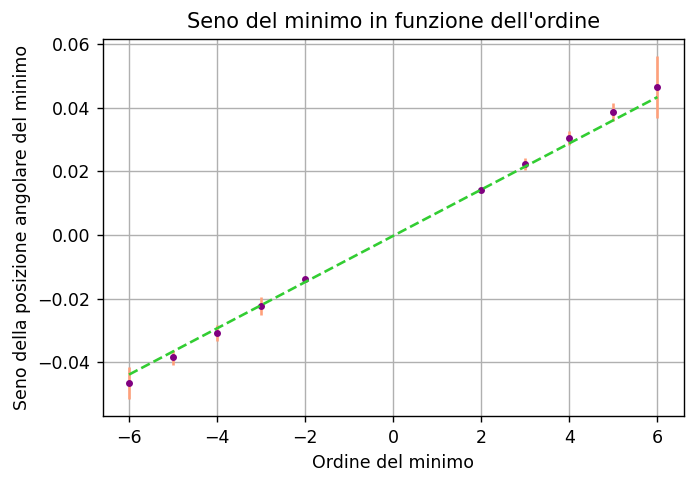

In [ ]:
ascisse_1f = [-6,-5,-4,-3,-2,2,3,4,5,6]

#grafico
plt.figure(dpi=125)
plt.plot(ascisse_1f, vertici_sen_1f, linestyle ="", marker=".", color="purple")
plt.errorbar(ascisse_1f, vertici_sen_1f, yerr=sigma_vertici_sen_1f, linestyle="", color="lightsalmon")
plt.xlabel("Ordine del minimo")
plt.ylabel("Seno della posizione angolare del minimo")
plt.title("Seno del minimo in funzione dell'ordine")
plt.grid()

#aggiungiamo la retta di regressione
a = -0.00026115769569005215
b = 0.007274388399596369
plt.plot(ascisse_1f, retta_interpolante(ascisse_1f, a, b), linestyle="--", marker="", color="limegreen")
print(sigma_vertici_sen_1f)

Come possiamo notare ad occhio, e poi indicato anche dal chi quadro, la retta interpolante non è una delle migliori

In [ ]:
#REGRESSIONE LINEARE, PEARSON, ERRORE A POSTERIORI

import math
import sys

#dati input
x = list(ascisse_1f)
y = list(vertici_sen_1f)
sigma = list(sigma_vertici_sen_1f)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.007274388399596369
sigma [b]
 0.00014555092977829146
intercetta [a]
 -0.00026115769569005215
sigma [a]
 0.0003342398448876843
pearson
 0.10285542794885866
sigma pearson
 0.35167825511066525
errore posteriori
 0.002048850075341347


Il valore del coefficiente di correlazione di Pearson è imputabile alla struttura matematica dello stesso

L'errore a posteriori ci dice che le incertezze sperimentali sono sottostimate, potrebbe esserci una sistematica, ma a mia opinione è dovuto alla dispersione dei punti

chi quadro 
 9.071580062397272


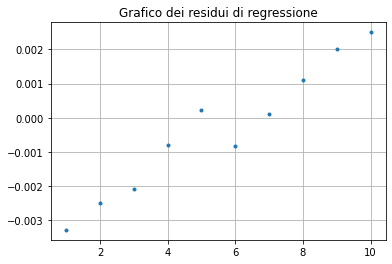

In [ ]:
#CHI QUADRO
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
y = list(vertici_sen_1f)
x = list(ascisse_1f)
sigma = list(sigma_vertici_sen_1f)
intercetta = 0.0003342398448876843
pendenza = 0.007274388399596369
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
  dummy_2 = 0
  dummy_3 = 0
  dummy_4 = 0
  dummy_2 = y[i] - y_ref[i]
  dummy_3 = dummy_2 / sigma[i]
  dummy_4 = dummy_3**2
  vettore_scarti_quadratici.append(dummy_4)
  vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

Il chi quadro dista molto dal NDOF, NDOF = 8

Inoltre notiamo un evidente trend lineare nei residui

**Calcoliamo adesso la larghezza di una fenditura**

In [ ]:
pendenza = 0.007274388399596369
sigma_pendenza = 0.00014555092977829146
num_pm = 6017
sigma_sistematico = num_pm * sigma_pm_rad

larghezza_fenditure = lunghezza_donda / pendenza #nm
print("Larghezza fenditure [nm] \n", larghezza_fenditure)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_larghezza_fenditure = math.sqrt( larghezza_fenditure**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_larghezza_fenditure)

Larghezza fenditure [nm] 
 92103.96299944283
Errore 
 1968.4163695030736


Considerando che la distanza tra le fenditure ci viene pari a 200 micrometri, e che ad occhio si vedeva che le fenditure erano molto più larghe (a occhio direi ordine dei millimetri), questo valore non è compatibile con la realtà

**per migliorare il risultato proviamo a fare due fit distinti, uno per la parte "negativa" e uno per la parte "positiva"**

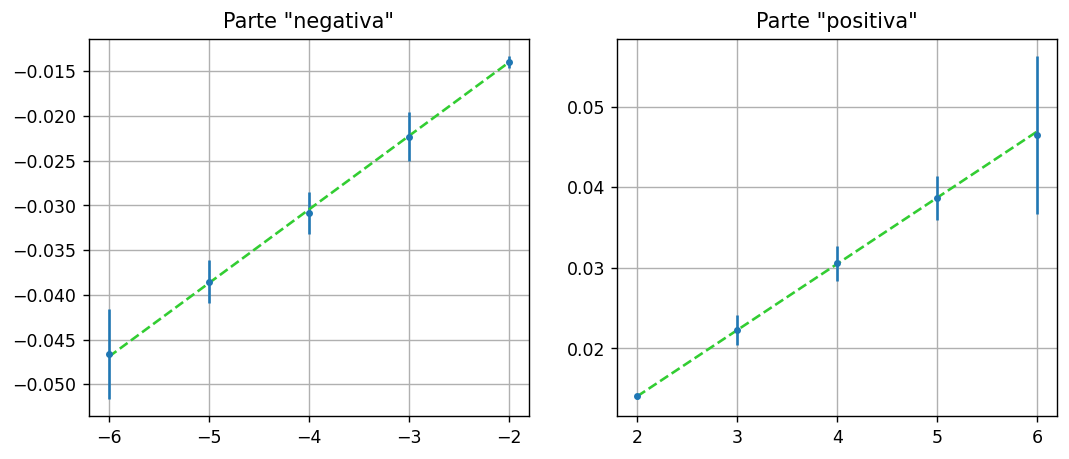

In [ ]:
ascissa_1f_pos = [2,3,4,5,6]
ascissa_1f_neg = [-6,-5,-4,-3,-2]
vertici_sen_1f_pos = vertici_sen_1f[5:]
vertici_sen_1f_neg = vertici_sen_1f[0:5]
sigma_vertici_sen_1f_pos = sigma_vertici_sen_1f[5:]
sigma_vertici_sen_1f_neg = sigma_vertici_sen_1f[0:5]

plt.figure(dpi=125, figsize=(10,4))

f1 = plt.subplot(1,2,1)
f1.errorbar(ascissa_1f_neg, vertici_sen_1f_neg, yerr=sigma_vertici_sen_1f_neg, marker=".", linestyle="")
f1.set_title("Parte \"negativa\"")
f1.grid()
#aggiungiamo la retta di regressione
a = 0.0024747664529213564
b = 0.00823455126600866
f1.plot(ascissa_1f_neg, retta_interpolante(ascissa_1f_neg, a, b), linestyle="--", marker="", color="limegreen")

f2 = plt.subplot(1,2,2)
f2.errorbar(ascissa_1f_pos, vertici_sen_1f_pos, yerr=sigma_vertici_sen_1f_pos, marker=".", linestyle="")
f2.set_title("Parte \"positiva\"")
f2.grid()
#aggiungiamo la retta di regressione
a = -0.0023866091575006076
b = 0.008220487416681008
f2.plot(ascissa_1f_pos, retta_interpolante(ascissa_1f_pos, a, b), linestyle="--", marker="", color="limegreen")

parte "negativa"

In [ ]:
import math
import sys

#dati input
x = list(ascissa_1f_neg)
y = list(vertici_sen_1f_neg)
sigma = list(sigma_vertici_sen_1f_neg)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.00823455126600866
sigma [b]
 0.0006300130921600221
intercetta [a]
 0.0024747664529213564
sigma [a]
 0.0016603645829413088
pearson
 0.025760286377261406
sigma pearson
 0.5771586747870299
errore posteriori
 0.00031476711248829144


chi quadro 
 987.0757150167927


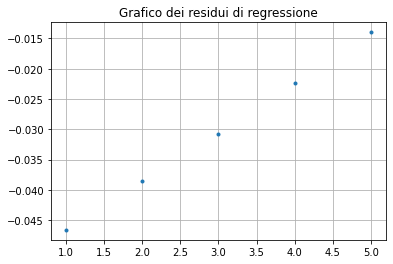

In [ ]:
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
x = list(ascissa_1f_neg)
y = list(vertici_sen_1f_neg)
sigma = list(sigma_vertici_sen_1f_neg)
intercetta = 0
pendenza = 0
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
	dummy_2 = 0
	dummy_3 = 0
	dummy_4 = 0
	dummy_2 = y[i] - y_ref[i]
	dummy_3 = dummy_2 / sigma[i]
	dummy_4 = dummy_3**2
	vettore_scarti_quadratici.append(dummy_4)
	vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

In [ ]:
pendenza = 0.00823455126600866
sigma_pendenza = 0.0006300130921600221
num_pm = 3017
sigma_sistematico = num_pm * sigma_pm_rad

larghezza_fenditure = lunghezza_donda / pendenza #nm
print("Larghezza fenditure [nm] \n", larghezza_fenditure)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_larghezza_fenditure = math.sqrt( larghezza_fenditure**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_larghezza_fenditure)

Larghezza fenditure [nm] 
 81364.48221115433
Errore 
 6254.711294491624


parte "positiva"

In [ ]:
import math
import sys

#dati input
x = list(ascissa_1f_pos)
y = list(vertici_sen_1f_pos)
sigma = list(sigma_vertici_sen_1f_pos)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.008220487416681008
sigma [b]
 0.0006535014697639942
intercetta [a]
 -0.0023866091575006076
sigma [a]
 0.0014296034348197863
pearson
 0.025703316420469597
sigma pearson
 0.5771595214279986
errore posteriori
 0.00026370635101808526


chi quadro 
 2202.529319925869


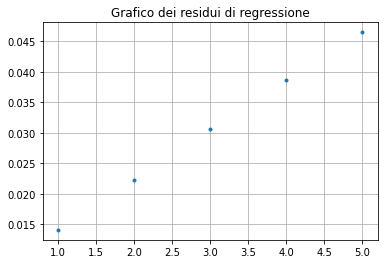

In [ ]:
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
x = list(ascissa_1f_pos)
y = list(vertici_sen_1f_pos)
sigma = list(sigma_vertici_sen_1f_pos)
intercetta = 0
pendenza = 0
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
	dummy_2 = 0
	dummy_3 = 0
	dummy_4 = 0
	dummy_2 = y[i] - y_ref[i]
	dummy_3 = dummy_2 / sigma[i]
	dummy_4 = dummy_3**2
	vettore_scarti_quadratici.append(dummy_4)
	vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

In [ ]:
pendenza = 0.008220487416681008
sigma_pendenza = 0.0006535014697639942 
num_pm = 3000
sigma_sistematico = num_pm * sigma_pm_rad

larghezza_fenditure = lunghezza_donda / pendenza #nm
print("Larghezza fenditure [nm] \n", larghezza_fenditure)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_larghezza_fenditure = math.sqrt( larghezza_fenditure**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_larghezza_fenditure)

Larghezza fenditure [nm] 
 81503.68293739329
Errore 
 6507.848583505223


#3 fenditure


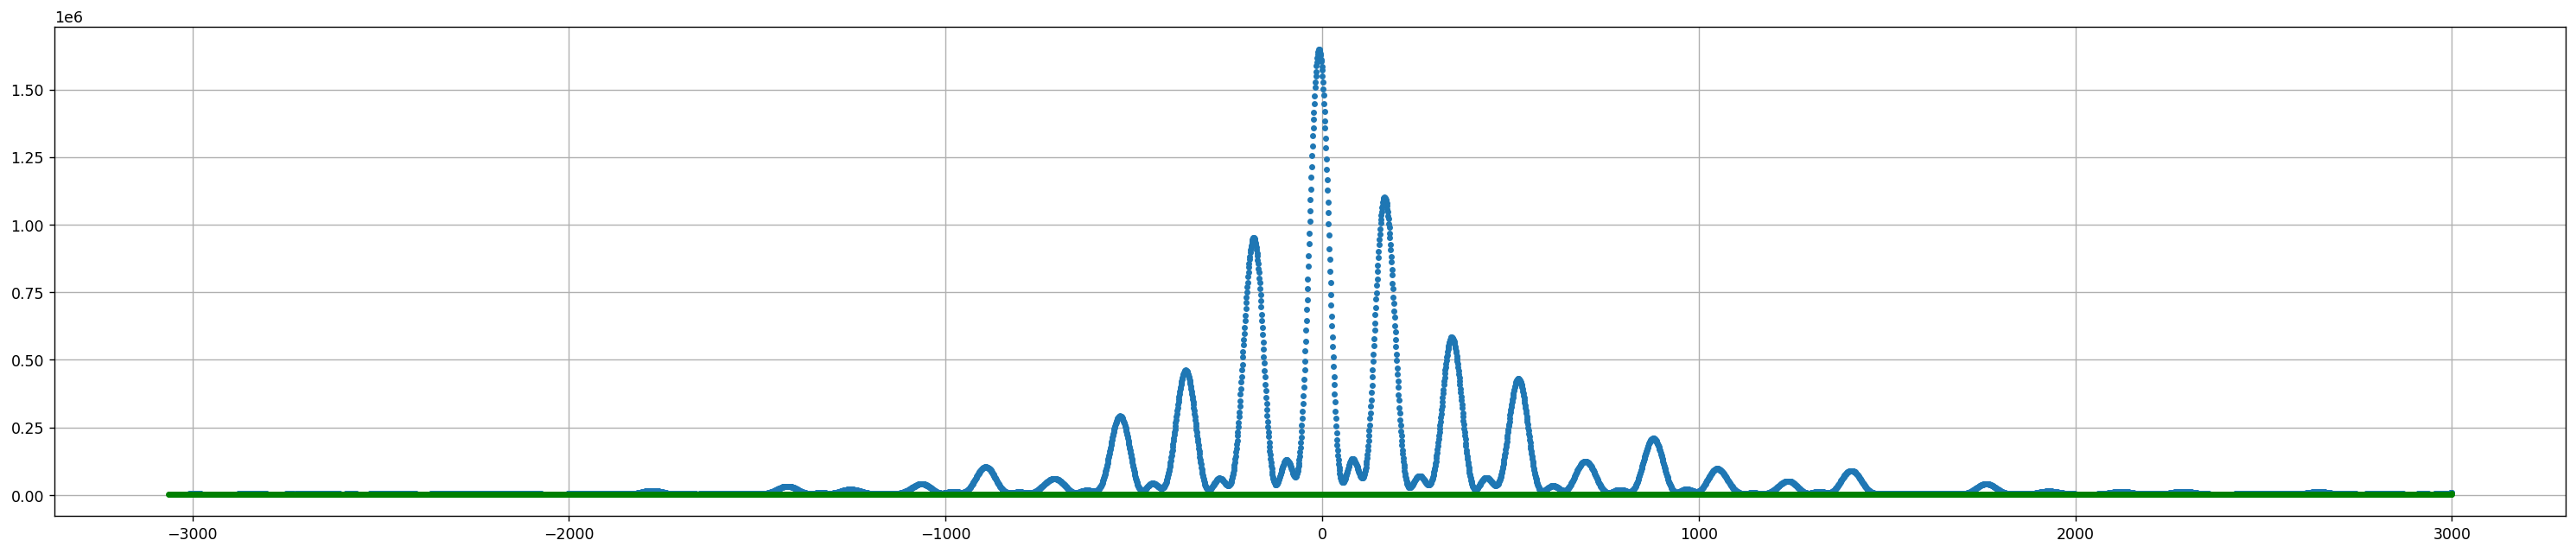

In [ ]:
#carichiamo i dati
pm_3f, int_3f = np.loadtxt("fenditure3.txt", delimiter=",",unpack="True")

#carichiamo il fondo
pm_fondo, int_fondo = np.loadtxt("fondolaserspento.txt", delimiter=",",unpack="True")

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_3f, int_3f, linestyle="", marker=".")
plt.plot(pm_fondo, int_fondo, linestyle="", marker=".", color="green")
plt.grid()

:estraiamo dei range per i minimi, in modo tale da utilizzare un fit parabolico

utilizziamo una numerazione crescente a partire dal range più negativo e proseguendo in avavnti


Text(0.5, 1.0, 'f13')

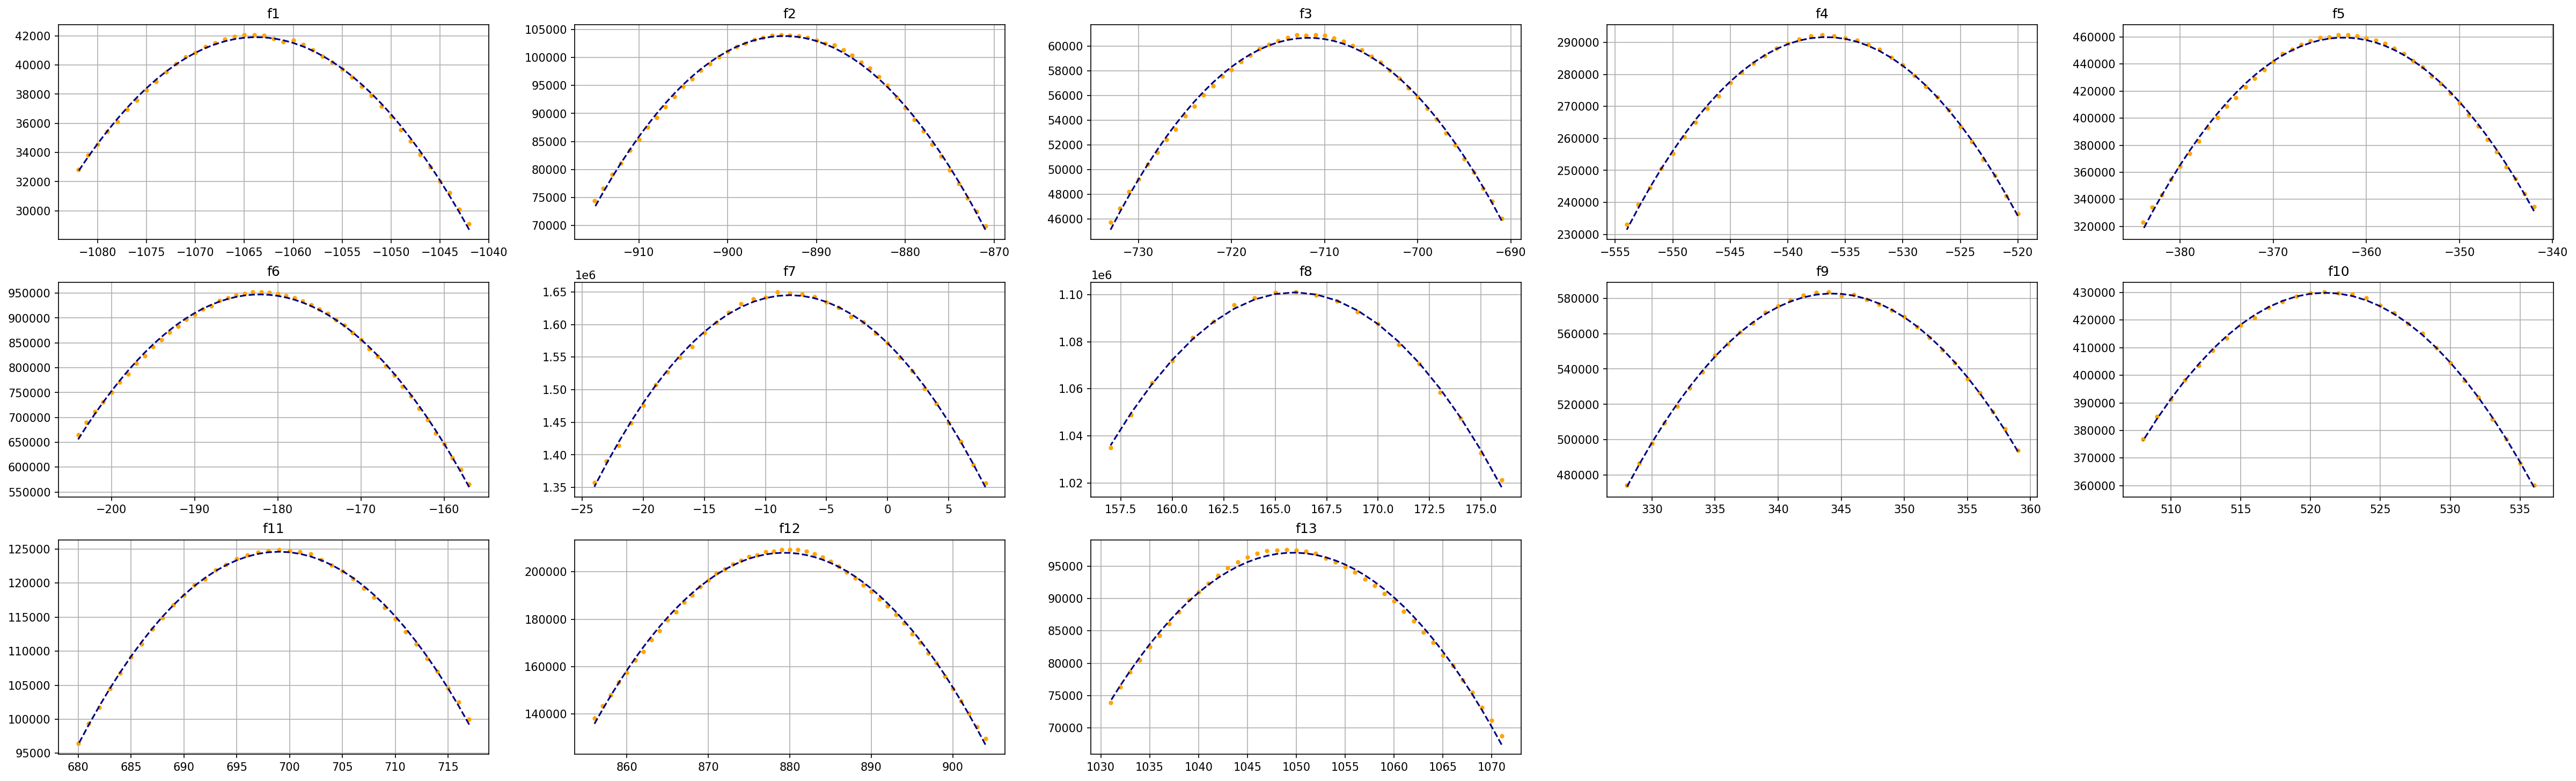

In [ ]:
plt.figure(dpi=150, figsize=(40,12))
#1   
pm_min_uno = pm_3f[4042 : 4083]
int_min_uno = int_3f[4042 : 4083]
f1 = plt.subplot(3,5,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange")
f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_3f, b1_3f, c1_3f), linestyle="--", marker="", color="navy")
f1.grid()
f1.set_title("f1")
#2   
pm_min_due = pm_3f[3871 : 3916]
int_min_due = int_3f[3871 : 3916]
f2 = plt.subplot(3,5,2)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange")
f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_3f, b2_3f, c2_3f), linestyle="--", marker="", color="navy")
f2.grid()
f2.set_title("f2")
#3   
pm_min_tre = pm_3f[3691 : 3734]
int_min_tre = int_3f[3691 : 3734]
f3 = plt.subplot(3,5,3)
f3.plot(pm_min_tre, int_min_tre, linestyle="", marker=".", color="orange")
f3.plot(pm_min_tre, parabola_fit(pm_min_tre, a3_3f, b3_3f, c3_3f), linestyle="--", marker="", color="navy")
f3.grid()
f3.set_title("f3")
#4   
pm_min_quattro = pm_3f[3520 : 3555]
int_min_quattro = int_3f[3520 : 3555]
f4 = plt.subplot(3,5,4)
f4.plot(pm_min_quattro, int_min_quattro, linestyle="", marker=".", color="orange")
f4.plot(pm_min_quattro, parabola_fit(pm_min_quattro, a4_3f, b4_3f, c4_3f), linestyle="--", marker="", color="navy")
f4.grid()
f4.set_title("f4")
#5   
pm_min_cinque = pm_3f[3342 : 3385]
int_min_cinque = int_3f[3342 : 3385]
f5 = plt.subplot(3,5,5)
f5.plot(pm_min_cinque, int_min_cinque, linestyle="", marker=".", color="orange")
f5.plot(pm_min_cinque, parabola_fit(pm_min_cinque, a5_3f, b5_3f, c5_3f), linestyle="--", marker="", color="navy")
f5.grid()
f5.set_title("f5")
#6   
pm_min_sei = pm_3f[3157 : 3205]
int_min_sei = int_3f[3157 : 3205]
f6 = plt.subplot(3,5,6)
f6.plot(pm_min_sei, int_min_sei, linestyle="", marker=".", color="orange")
f6.plot(pm_min_sei , parabola_fit(pm_min_sei, a6_3f, b6_3f, c6_3f), linestyle="--", marker="", color="navy")
f6.grid()
f6.set_title("f6")
#7 (il massimo di intensità)  
pm_min_sette = pm_3f[2992 : 3025]
int_min_sette = int_3f[2992 : 3025]
f7 = plt.subplot(3,5,7)
f7.plot(pm_min_sette, int_min_sette, linestyle="", marker=".", color="orange")
f7.plot(pm_min_sette , parabola_fit(pm_min_sette, a7_3f, b7_3f, c7_3f), linestyle="--", marker="", color="navy")
f7.grid()
f7.set_title("f7")
#8   
pm_min_otto = pm_3f[2824 : 2844]
int_min_otto = int_3f[2824 : 2844]
f8 = plt.subplot(3,5,8)
f8.plot(pm_min_otto, int_min_otto, linestyle="", marker=".", color="orange")
f8.plot(pm_min_otto , parabola_fit(pm_min_otto, a8_3f, b8_3f, c8_3f), linestyle="--", marker="", color="navy")
f8.grid()
f8.set_title("f8")
#9   
pm_min_nove = pm_3f[2641 : 2673]
int_min_nove = int_3f[2641 : 2673]
f9 = plt.subplot(3,5,9)
f9.plot(pm_min_nove, int_min_nove, linestyle="", marker=".", color="orange")
f9.plot(pm_min_nove , parabola_fit(pm_min_nove, a9_3f, b9_3f, c9_3f), linestyle="--", marker="", color="navy")
f9.grid()
f9.set_title("f9")
#10   
pm_min_dieci = pm_3f[2464 : 2493]
int_min_dieci = int_3f[2464 : 2493]
f10 = plt.subplot(3,5,10)
f10.plot(pm_min_dieci, int_min_dieci, linestyle="", marker=".", color="orange")
f10.plot(pm_min_dieci , parabola_fit(pm_min_dieci, a10_3f, b10_3f, c10_3f), linestyle="--", marker="", color="navy")
f10.grid()
f10.set_title("f10")
#11   
pm_min_undici = pm_3f[2283 : 2321]
int_min_undici = int_3f[2283 : 2321]
f11 = plt.subplot(3,5,11)
f11.plot(pm_min_undici, int_min_undici, linestyle="", marker=".", color="orange")
f11.plot(pm_min_undici , parabola_fit(pm_min_undici, a11_3f, b11_3f, c11_3f), linestyle="--", marker="", color="navy")
f11.grid()
f11.set_title("f11")
#12   
pm_min_dodici = pm_3f[2096 : 2145]
int_min_dodici = int_3f[2096 : 2145]
f12 = plt.subplot(3,5,12)
f12.plot(pm_min_dodici, int_min_dodici, linestyle="", marker=".", color="orange")
f12.plot(pm_min_dodici , parabola_fit(pm_min_dodici, a12_3f, b12_3f, c12_3f), linestyle="--", marker="", color="navy")
f12.grid()
f12.set_title("f12")
#13   
pm_min_tredici = pm_3f[1929 : 1970]
int_min_tredici = int_3f[1929 : 1970]
f13 = plt.subplot(3,5,13)
f13.plot(pm_min_tredici, int_min_tredici, linestyle="", marker=".", color="orange")
f13.plot(pm_min_tredici , parabola_fit(pm_min_tredici, a13_3f, b13_3f, c13_3f), linestyle="--", marker="", color="navy")
f13.grid()
f13.set_title("f13")

Procediamo con il fit parabolico per determinare i massimi

In [ ]:
#minimo 1
par_1_3f, cov_1_3f = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_3f)
print("Matrice covarianza 1 \n", cov_1_3f)
a1_3f, b1_3f, c1_3f = par_1_3f
var_a1_3f = cov_1_3f[0,0]
var_b1_3f = cov_1_3f[1,1]
  #covar_ab1_3f = cov_1_3f[1,2]
#minimo 2
par_2_3f, cov_2_3f = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_3f)
print("Matrice covarianza 2 \n", cov_2_3f)
a2_3f, b2_3f, c2_3f = par_2_3f
var_a2_3f = cov_2_3f[0,0]
var_b2_3f = cov_2_3f[1,1]
  #covar_ab2_3f = cov_2_3f[1,2]
#minimo 3
par_3_3f, cov_3_3f = curve_fit(parabola_fit, pm_min_tre , int_min_tre , sigma=([sigma_1f]*len(int_min_tre)))
print("Parametri 3 a,b,c \n", par_3_3f)
print("Matrice covarianza 3 \n", cov_3_3f)
a3_3f, b3_3f, c3_3f = par_3_3f
var_a3_3f = cov_3_3f[0,0]
var_b3_3f = cov_3_3f[1,1]
  #covar_ab3_3f = cov_3_3f[1,2]
#minimo 4
par_4_3f, cov_4_3f = curve_fit(parabola_fit, pm_min_quattro , int_min_quattro , sigma=([sigma_1f]*len(int_min_quattro)))
print("Parametri 4 a,b,c \n", par_4_3f)
print("Matrice covarianza 4 \n", cov_4_3f)
a4_3f, b4_3f, c4_3f = par_4_3f
var_a4_3f = cov_4_3f[0,0]
var_b4_3f = cov_4_3f[1,1]
  #covar_ab4_3f = cov_4_3f[1,2]
#minimo 5
par_5_3f, cov_5_3f = curve_fit(parabola_fit, pm_min_cinque , int_min_cinque , sigma=([sigma_1f]*len(int_min_cinque)))
print("Parametri 5 a,b,c \n", par_5_3f)
print("Matrice covarianza 5 \n", cov_5_3f)
a5_3f, b5_3f, c5_3f = par_5_3f
var_a5_3f = cov_5_3f[0,0]
var_b5_3f = cov_5_3f[1,1]
  #covar_ab5_3f = cov_5_3f[1,2]
#minimo 6
par_6_3f, cov_6_3f = curve_fit(parabola_fit, pm_min_sei , int_min_sei , sigma=([sigma_1f]*len(int_min_sei)))
print("Parametri 6 a,b,c \n", par_6_3f)
print("Matrice covarianza 6 \n", cov_6_3f)
a6_3f, b6_3f, c6_3f = par_6_3f
var_a6_3f = cov_6_3f[0,0]
var_b6_3f = cov_6_3f[1,1]
  #covar_ab6_3f = cov_6_3f[1,2]
#minimo 7
par_7_3f, cov_7_3f = curve_fit(parabola_fit, pm_min_sette , int_min_sette , sigma=([sigma_1f]*len(int_min_sette)))
print("Parametri 7 a,b,c \n", par_7_3f)
print("Matrice covarianza 7 \n", cov_7_3f)
a7_3f, b7_3f, c7_3f = par_7_3f
var_a7_3f = cov_7_3f[0,0]
var_b7_3f = cov_7_3f[1,1]
  #covar_ab7_3f = cov_7_3f[1,2]
#minimo 8
par_8_3f, cov_8_3f = curve_fit(parabola_fit, pm_min_otto , int_min_otto , sigma=([sigma_1f]*len(int_min_otto)))
print("Parametri 8 a,b,c \n", par_8_3f)
print("Matrice covarianza 8 \n", cov_8_3f)
a8_3f, b8_3f, c8_3f = par_8_3f
var_a8_3f = cov_8_3f[0,0]
var_b8_3f = cov_8_3f[1,1]
  #covar_ab8_3f = cov_8_3f[1,2]
#minimo 9
par_9_3f, cov_9_3f = curve_fit(parabola_fit, pm_min_nove , int_min_nove , sigma=([sigma_1f]*len(int_min_nove)))
print("Parametri 9 a,b,c \n", par_9_3f)
print("Matrice covarianza 9 \n", cov_9_3f)
a9_3f, b9_3f, c9_3f = par_9_3f
var_a9_3f = cov_9_3f[0,0]
var_b9_3f = cov_9_3f[1,1]
  #covar_ab9_3f = cov_9_3f[1,2]
#minimo 10
par_10_3f, cov_10_3f = curve_fit(parabola_fit, pm_min_dieci , int_min_dieci , sigma=([sigma_1f]*len(int_min_dieci)))
print("Parametri 10 a,b,c \n", par_10_3f)
print("Matrice covarianza 10 \n", cov_10_3f)
a10_3f, b10_3f, c10_3f = par_10_3f
var_a10_3f = cov_10_3f[0,0]
var_b10_3f = cov_10_3f[1,1]
  #covar_ab10_3f = cov_10_3f[1,2]
#minimo 11
par_11_3f, cov_11_3f = curve_fit(parabola_fit, pm_min_undici , int_min_undici , sigma=([sigma_1f]*len(int_min_undici)))
print("Parametri 11 a,b,c \n", par_11_3f)
print("Matrice covarianza 11 \n", cov_11_3f)
a11_3f, b11_3f, c11_3f = par_11_3f
var_a11_3f = cov_11_3f[0,0]
var_b11_3f = cov_11_3f[1,1]
  #covar_ab11_3f = cov_11_3f[1,2]
#minimo 12
par_12_3f, cov_12_3f = curve_fit(parabola_fit, pm_min_dodici , int_min_dodici , sigma=([sigma_1f]*len(int_min_dodici)))
print("Parametri 12 a,b,c \n", par_12_3f)
print("Matrice covarianza 12 \n", cov_12_3f)
a12_3f, b12_3f, c12_3f = par_12_3f
var_a12_3f = cov_12_3f[0,0]
var_b12_3f = cov_12_3f[1,1]
  #covar_ab12_3f = cov_12_3f[1,2]
#minimo 13
par_13_3f, cov_13_3f = curve_fit(parabola_fit, pm_min_tredici , int_min_tredici , sigma=([sigma_1f]*len(int_min_tredici)))
print("Parametri 13 a,b,c \n", par_13_3f)
print("Matrice covarianza 13 \n", cov_13_3f)
a13_3f, b13_3f, c13_3f = par_13_3f
var_a13_3f = cov_13_3f[0,0]
var_b13_3f = cov_13_3f[1,1]
  #covar_ab13_3f = cov_13_3f[1,2]

Parametri 1 a,b,c 
 [-2.78070199e+01 -5.91618636e+04 -3.14260961e+07]
Matrice covarianza 1 
 [[4.00949945e-02 8.51617682e+01 4.52152855e+04]
 [8.51617682e+01 1.80888078e+05 9.60420270e+07]
 [4.52152855e+04 9.60420270e+07 5.09945146e+10]]
Parametri 2 a,b,c 
 [-6.73435934e+01 -1.20363869e+05 -5.36780468e+07]
Matrice covarianza 2 
 [[1.93672314e-01 3.45898748e+02 1.54411123e+05]
 [3.45898748e+02 6.17801249e+05 2.75801563e+08]
 [1.54411123e+05 2.75801563e+08 1.23129761e+11]]
Parametri 3 a,b,c 
 [-3.43207377e+01 -4.88549736e+04 -1.73253901e+07]
Matrice covarianza 3 
 [[6.07323120e-02 8.64828106e+01 3.07785272e+04]
 [8.64828106e+01 1.23158990e+05 4.38339405e+07]
 [3.07785272e+04 4.38339405e+07 1.56020372e+10]]
Parametri 4 a,b,c 
 [-2.00967512e+02 -2.15711160e+05 -5.75923978e+07]
Matrice covarianza 4 
 [[1.36401917e+00 1.46495657e+03 3.93201703e+05]
 [1.46495657e+03 1.57347437e+06 4.22358248e+08]
 [3.93201703e+05 4.22358248e+08 1.13379101e+11]]
Parametri 5 a,b,c 
 [-3.06218323e+02 -2.21987467

Calcoliamo il vertice in pm e poi convertiamo lo stesso in angolo ed il seno dello stesso, il possibile errore sistematico che affligge ogni punto verrà poi imputato solo alla pendenza della retta interpolante

In [ ]:
#1
vertice_1_3f = vertice_parabola(b1_3f, a1_3f)
sigmav_1_3f = sigma_vertice_parabola(vertice_1_3f, b1_3f, math.sqrt(var_b1_3f), a1_3f, math.sqrt(var_a1_3f))
#2
vertice_2_3f = vertice_parabola(b2_3f, a2_3f)
sigmav_2_3f = sigma_vertice_parabola(vertice_2_3f, b2_3f, math.sqrt(var_b2_3f), a2_3f, math.sqrt(var_a2_3f))
#3
vertice_3_3f = vertice_parabola(b3_3f, a3_3f)
sigmav_3_3f = sigma_vertice_parabola(vertice_3_3f, b3_3f, math.sqrt(var_b3_3f), a3_3f, math.sqrt(var_a3_3f))
#4
vertice_4_3f = vertice_parabola(b4_3f, a4_3f)
sigmav_4_3f = sigma_vertice_parabola(vertice_4_3f, b4_3f, math.sqrt(var_b4_3f), a4_3f, math.sqrt(var_a4_3f))
#5
vertice_5_3f = vertice_parabola(b5_3f, a5_3f)
sigmav_5_3f = sigma_vertice_parabola(vertice_5_3f, b5_3f, math.sqrt(var_b5_3f), a5_3f, math.sqrt(var_a5_3f))
#6
vertice_6_3f = vertice_parabola(b6_3f, a6_3f)
sigmav_6_3f = sigma_vertice_parabola(vertice_6_3f, b6_3f, math.sqrt(var_b6_3f), a6_3f, math.sqrt(var_a6_3f))
#7
vertice_7_3f = vertice_parabola(b7_3f, a7_3f)
sigmav_7_3f = sigma_vertice_parabola(vertice_7_3f, b7_3f, math.sqrt(var_b7_3f), a7_3f, math.sqrt(var_a7_3f))
#8
vertice_8_3f = vertice_parabola(b8_3f, a8_3f)
sigmav_8_3f = sigma_vertice_parabola(vertice_8_3f, b8_3f, math.sqrt(var_b8_3f), a8_3f, math.sqrt(var_a8_3f))
#9
vertice_9_3f = vertice_parabola(b9_3f, a9_3f)
sigmav_9_3f = sigma_vertice_parabola(vertice_9_3f, b9_3f, math.sqrt(var_b9_3f), a9_3f, math.sqrt(var_a9_3f))
#10
vertice_10_3f = vertice_parabola(b10_3f, a10_3f)
sigmav_10_3f = sigma_vertice_parabola(vertice_10_3f, b10_3f, math.sqrt(var_b10_3f), a10_3f, math.sqrt(var_a10_3f))
#11
vertice_11_3f = vertice_parabola(b11_3f, a11_3f)
sigmav_11_3f = sigma_vertice_parabola(vertice_11_3f, b11_3f, math.sqrt(var_b11_3f), a11_3f, math.sqrt(var_a11_3f))
#12
vertice_12_3f = vertice_parabola(b12_3f, a12_3f)
sigmav_12_3f = sigma_vertice_parabola(vertice_12_3f, b12_3f, math.sqrt(var_b12_3f), a12_3f, math.sqrt(var_a12_3f))
#13
vertice_13_3f = vertice_parabola(b13_3f, a13_3f)
sigmav_13_3f = sigma_vertice_parabola(vertice_13_3f, b13_3f, math.sqrt(var_b13_3f), a13_3f, math.sqrt(var_a13_3f))

#costruiamo il vettore dei vertici in passi motore
vertici_pm_3f = [vertice_1_3f,vertice_2_3f,vertice_3_3f,vertice_4_3f,vertice_5_3f,vertice_6_3f,vertice_7_3f,vertice_8_3f,vertice_9_3f,vertice_10_3f,vertice_11_3f,vertice_12_3f,vertice_13_3f]
sigma_vertici_pm_3f = [sigmav_1_3f,sigmav_2_3f,sigmav_3_3f,sigmav_4_3f,sigmav_5_3f,sigmav_6_3f,sigmav_7_3f,sigmav_8_3f,sigmav_9_3f,sigmav_10_3f,sigmav_11_3f,sigmav_12_3f,sigmav_13_3f]

#convertiamo i pm in radianti
vertici_rad_3f = []
for i in vertici_pm_3f:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_3f.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_3f = []
for i in vertici_rad_3f:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_3f.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_3f = []
for i in sigma_vertici_pm_3f:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_3f.append(dummy)
sigma_vertici_sen_3f = []
for i in sigma_vertici_rad_3f:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_3f.append(dummy)
print(sigma_vertici_sen_3f)

[0.00032534288035892297, 0.0002480756402573899, 0.00021714421642508595, 0.00013252393979249567, 0.00011347114581374846, 4.435246786863734e-05, 2.257966376583094e-06, 7.412227633864144e-05, 6.130494841793389e-05, 0.00011065779280349743, 0.00016350807652535084, 0.0002610727692381329, 0.00047537541332167294]


costruiamo il grafico sen( ) in funzione dell'ordine del massimo

[0.00032534288035892297, 0.0002480756402573899, 0.00021714421642508595, 0.00013252393979249567, 0.00011347114581374846, 4.435246786863734e-05, 2.257966376583094e-06, 7.412227633864144e-05, 6.130494841793389e-05, 0.00011065779280349743, 0.00016350807652535084, 0.0002610727692381329, 0.00047537541332167294]


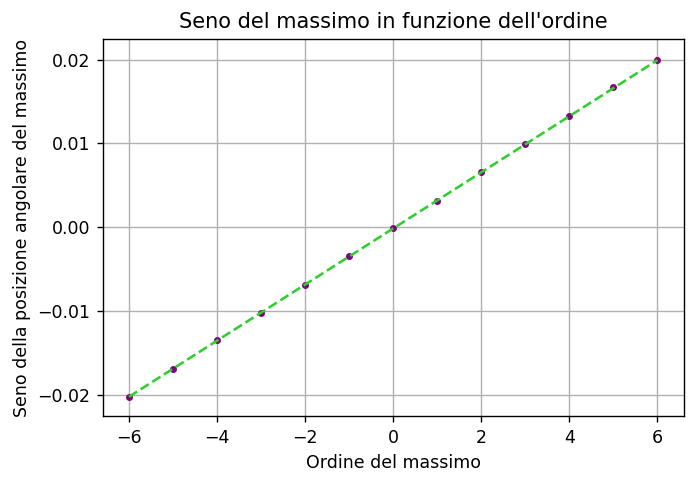

In [ ]:
ascisse_3f = [-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0]

#grafico
plt.figure(dpi=125)
plt.plot(ascisse_3f, vertici_sen_3f, linestyle ="", marker=".", color="purple")
plt.errorbar(ascisse_3f, vertici_sen_3f, yerr=sigma_vertici_sen_3f, linestyle="", color="lightsalmon")
plt.xlabel("Ordine del massimo")
plt.ylabel("Seno della posizione angolare del massimo")
plt.title("Seno del massimo in funzione dell'ordine")
plt.grid()

#aggiungiamo la retta di regressione
a = -0.00015210131204579727
b = 0.003347578684439936
plt.plot(ascisse_3f, retta_interpolante(ascisse_3f, a, b), linestyle="--", marker="", color="limegreen")
print(sigma_vertici_sen_3f)

Le incertezze sono troppo piccole per essere viste sul grafico

In [ ]:
#REGRESSIONE LINEARE, PEARSON, ERRORE A POSTERIORI

import math
import sys

#dati input
x = list(ascisse_3f)
y = list(vertici_sen_3f)
sigma = list(sigma_vertici_sen_3f)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.003347578684439936
sigma [b]
 1.3456018866379633e-05
intercetta [a]
 -0.00015210131204579727
sigma [a]
 2.250680325507188e-06
pearson
 0.04523977779594806
sigma pearson
 0.30120264433599775
errore posteriori
 5.2529013575525305e-05


Per quanto riguarda il basso valore del coefficiente di Pearson è dovuto alla struttura dello stesso consideranzo la minima pendenza della retta

L'errore a postreriori ci dice che le incertezze sperimentali sono grandi e che potremmo dubitare della linearità del modello, non credo che questo sia il nostro caso

chi quadro 
 1.6563304311637455


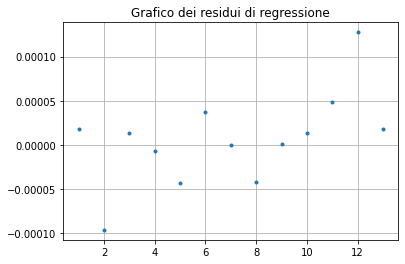

In [ ]:
#CHI QUADRO
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
y = list(vertici_sen_3f)
x = list(ascisse_3f)
sigma = list(sigma_vertici_sen_3f)
intercetta = -0.00015210131204579727
pendenza = 0.003347578684439936
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
  dummy_2 = 0
  dummy_3 = 0
  dummy_4 = 0
  dummy_2 = y[i] - y_ref[i]
  dummy_3 = dummy_2 / sigma[i]
  dummy_4 = dummy_3**2
  vettore_scarti_quadratici.append(dummy_4)
  vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

Che dista sensibilmente dal numero di gradi di libertà, NDOF = 11


**Calcoliamo adesso la distanza tra le fenditure**

In [ ]:
pendenza = 0.003347578684439936
sigma_pendenza = 1.3456018866379633e-05
num_pm = 6009
sigma_sistematico = num_pm * sigma_pm_rad

distanza_fenditure = lunghezza_donda / pendenza #nm
print("Distanza fenditure [nm] \n", distanza_fenditure)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_distanza_fenditure = math.sqrt( distanza_fenditure**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_distanza_fenditure)

Distanza fenditure [nm] 
 200144.66071081875
Errore 
 1704.8379682986267


che corrisponde a circa 200 $\pm$ 1 micrometri

#Capello

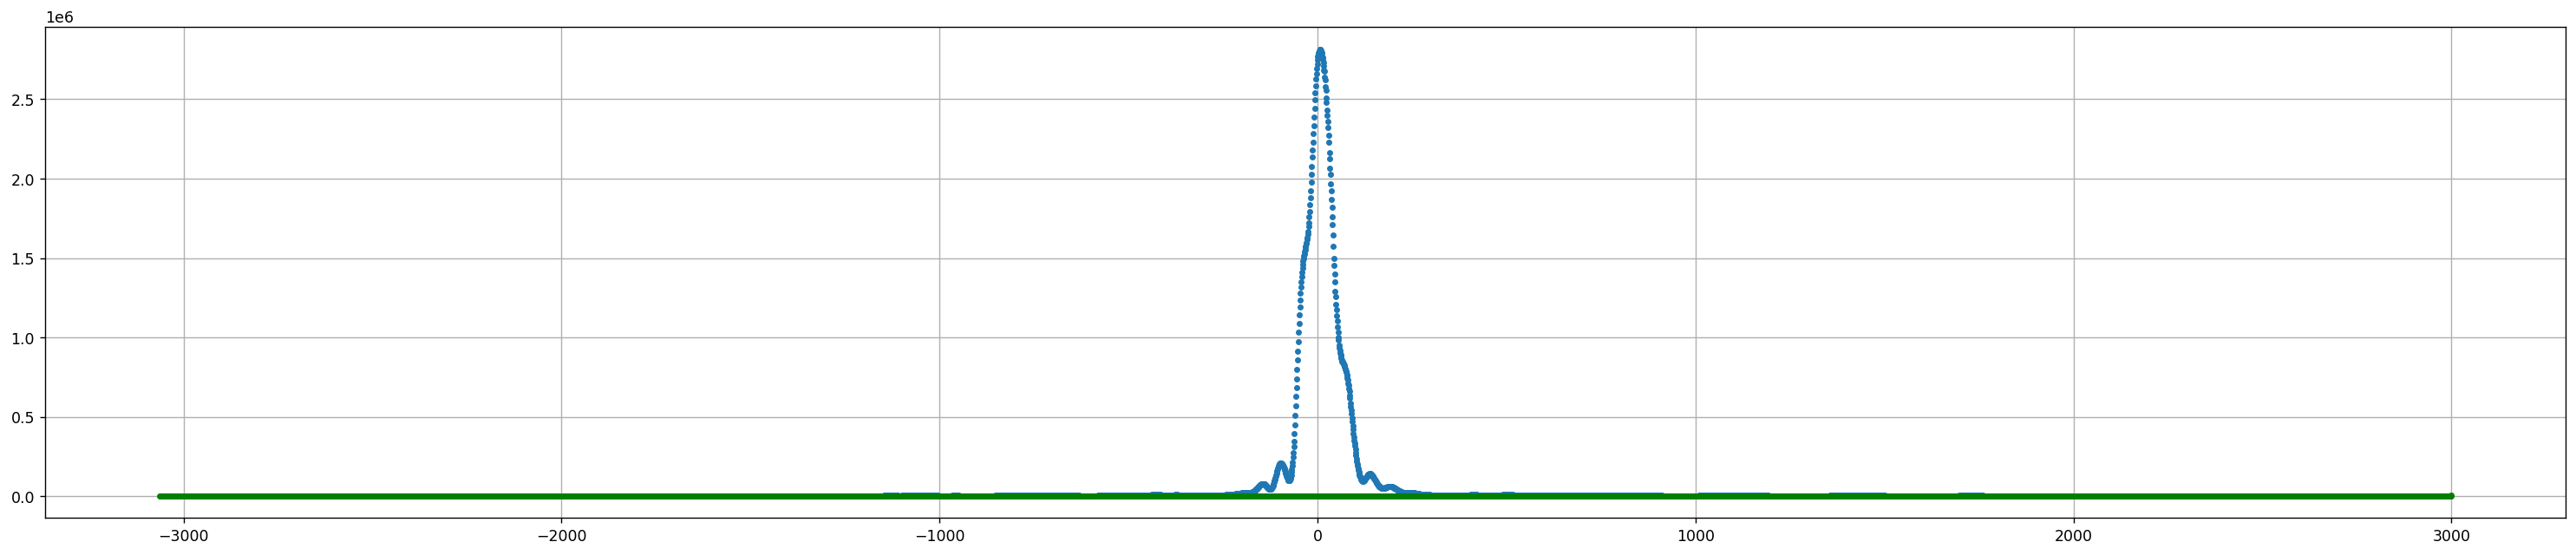

In [ ]:
#carichiamo i dati
pm_capello, int_capello = np.loadtxt("capello.txt", delimiter=",",unpack="True")

#carichiamo il fondo
pm_fondo, int_fondo = np.loadtxt("fondolaserspento.txt", delimiter=",",unpack="True")

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_capello, int_capello, linestyle="", marker=".")
plt.plot(pm_fondo, int_fondo, linestyle="", marker=".", color="green")
plt.grid()

Estraiamo i minimi e grafichiamoli

Text(0.5, 1.0, 'f6')

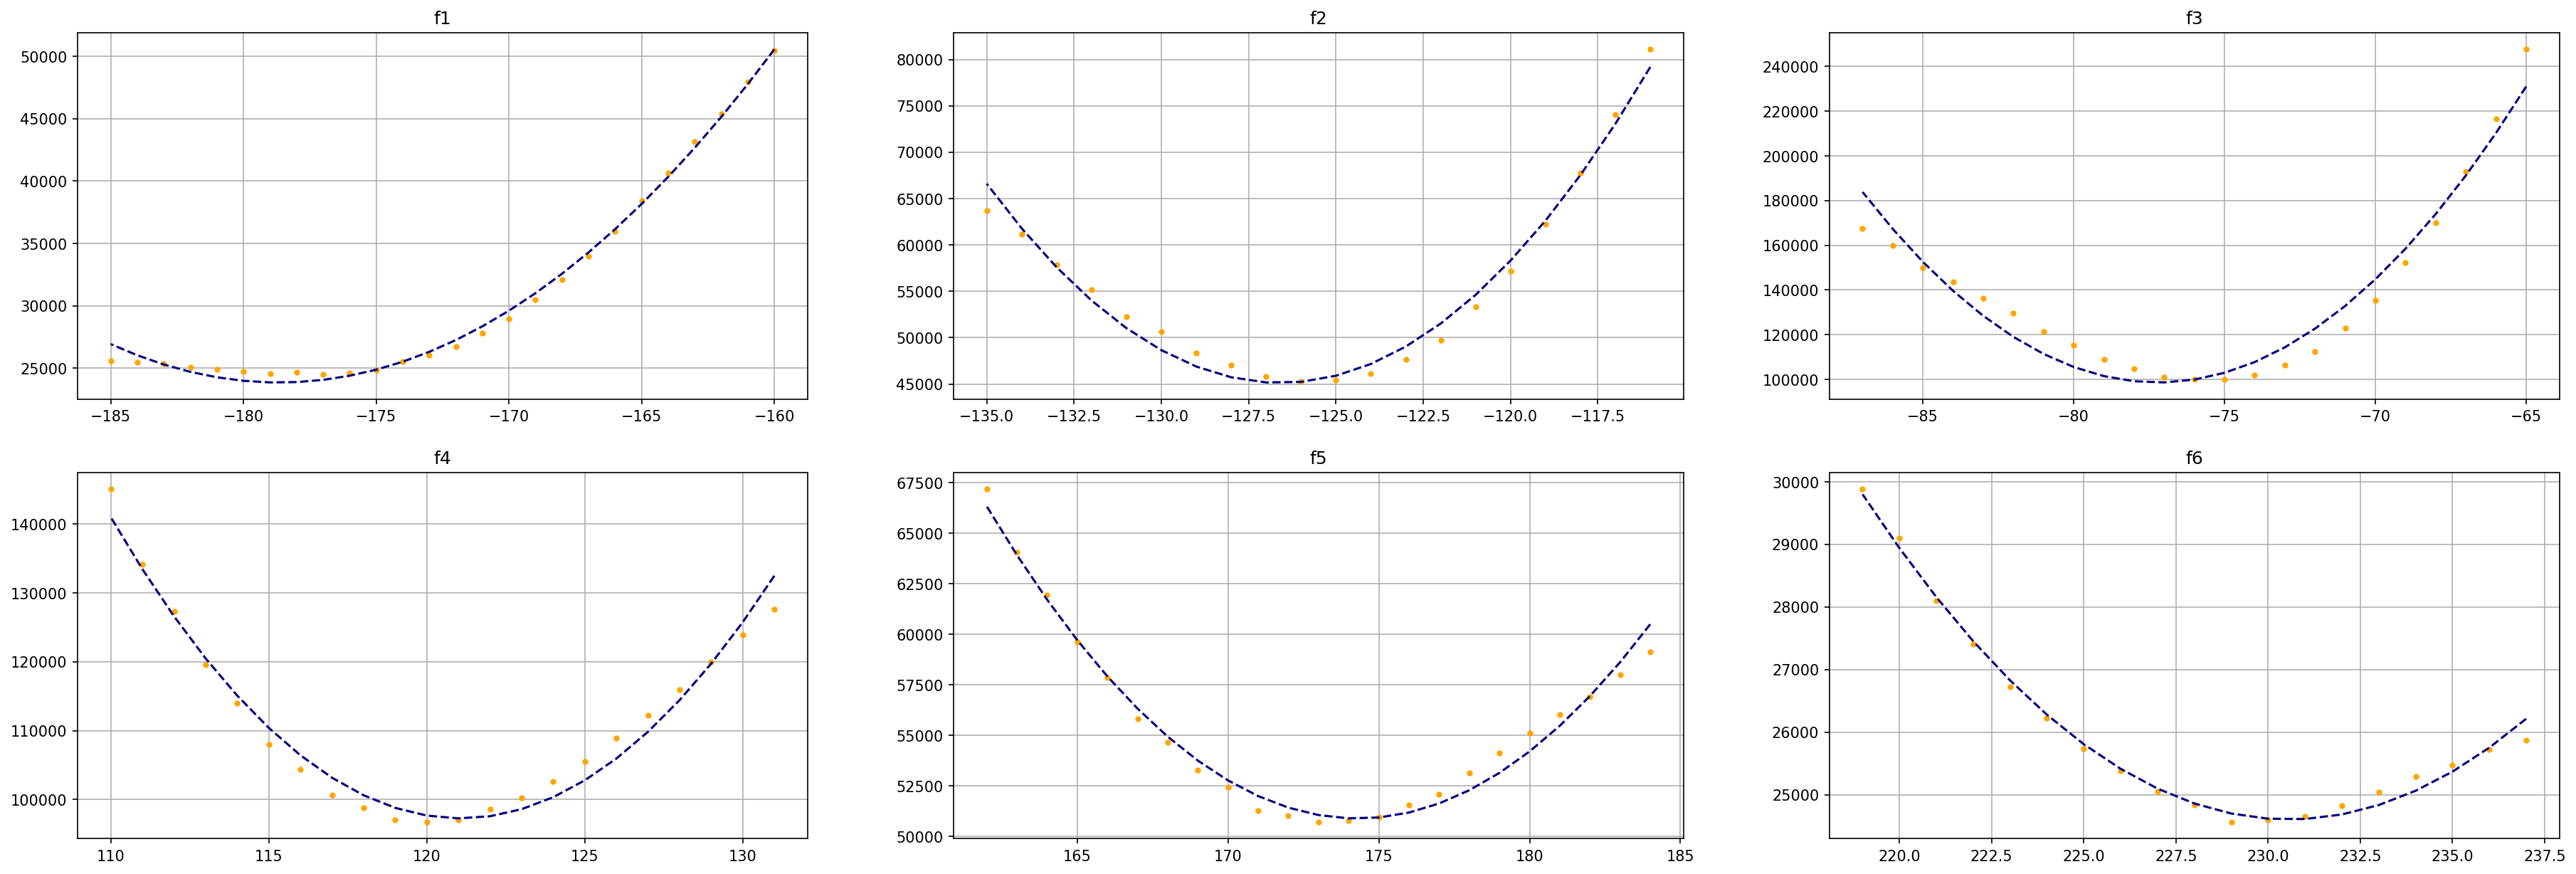

In [ ]:
plt.figure(dpi=150, figsize=(30,10))
#1   
pm_min_uno = pm_capello[2160 : 2186]
int_min_uno = int_capello[2160 : 2186]
f1 = plt.subplot(2,3,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange")
f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_capello, b1_capello, c1_capello), linestyle="--", marker="", color="navy")
f1.grid()
f1.set_title("f1")
#2   
pm_min_due = pm_capello[2116 : 2136]
int_min_due = int_capello[2116 : 2136]
f2 = plt.subplot(2,3,2)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange")
f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_capello, b2_capello, c2_capello), linestyle="--", marker="", color="navy")
f2.grid()
f2.set_title("f2")
#3   
pm_min_tre = pm_capello[2065 : 2088]
int_min_tre = int_capello[2065 : 2088]
f3 = plt.subplot(2,3,3)
f3.plot(pm_min_tre, int_min_tre, linestyle="", marker=".", color="orange")
f3.plot(pm_min_tre, parabola_fit(pm_min_tre, a3_capello, b3_capello, c3_capello), linestyle="--", marker="", color="navy")
f3.grid()
f3.set_title("f3")
#4   
pm_min_quattro = pm_capello[1869 : 1891]
int_min_quattro = int_capello[1869 : 1891]
f4 = plt.subplot(2,3,4)
f4.plot(pm_min_quattro, int_min_quattro, linestyle="", marker=".", color="orange")
f4.plot(pm_min_quattro, parabola_fit(pm_min_quattro, a4_capello, b4_capello, c4_capello), linestyle="--", marker="", color="navy")
f4.grid()
f4.set_title("f4")
#5   
pm_min_cinque = pm_capello[1816 : 1839]
int_min_cinque = int_capello[1816 : 1839]
f5 = plt.subplot(2,3,5)
f5.plot(pm_min_cinque, int_min_cinque, linestyle="", marker=".", color="orange")
f5.plot(pm_min_cinque, parabola_fit(pm_min_cinque, a5_capello, b5_capello, c5_capello), linestyle="--", marker="", color="navy")
f5.grid()
f5.set_title("f5")
#6   
pm_min_sei = pm_capello[1763 : 1782]
int_min_sei = int_capello[1763 : 1782]
f6 = plt.subplot(2,3,6)
f6.plot(pm_min_sei, int_min_sei, linestyle="", marker=".", color="orange")
f6.plot(pm_min_sei , parabola_fit(pm_min_sei, a6_capello, b6_capello, c6_capello), linestyle="--", marker="", color="navy")
f6.grid()
f6.set_title("f6")

Fit parabolico per determinare i minimi

In [ ]:
#minimo 1
par_1_capello, cov_1_capello = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_capello)
print("Matrice covarianza 1 \n", cov_1_capello)
a1_capello, b1_capello, c1_capello = par_1_capello
var_a1_capello = cov_1_capello[0,0]
var_b1_capello = cov_1_capello[1,1]

#minimo 2
par_2_capello, cov_2_capello = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_capello)
print("Matrice covarianza 2 \n", cov_2_capello)
a2_capello, b2_capello, c2_capello = par_2_capello
var_a2_capello = cov_2_capello[0,0]
var_b2_capello = cov_2_capello[1,1]

#minimo 3
par_3_capello, cov_3_capello = curve_fit(parabola_fit, pm_min_tre , int_min_tre , sigma=([sigma_1f]*len(int_min_tre)))
print("Parametri 3 a,b,c \n", par_3_capello)
print("Matrice covarianza 3 \n", cov_3_capello)
a3_capello, b3_capello, c3_capello = par_3_capello
var_a3_capello = cov_3_capello[0,0]
var_b3_capello = cov_3_capello[1,1]
  
#minimo 4
par_4_capello, cov_4_capello = curve_fit(parabola_fit, pm_min_quattro , int_min_quattro , sigma=([sigma_1f]*len(int_min_quattro)))
print("Parametri 4 a,b,c \n", par_4_capello)
print("Matrice covarianza 4 \n", cov_4_capello)
a4_capello, b4_capello, c4_capello = par_4_capello
var_a4_capello = cov_4_capello[0,0]
var_b4_capello = cov_4_capello[1,1]
  
#minimo 5
par_5_capello, cov_5_capello = curve_fit(parabola_fit, pm_min_cinque , int_min_cinque , sigma=([sigma_1f]*len(int_min_cinque)))
print("Parametri 5 a,b,c \n", par_5_capello)
print("Matrice covarianza 5 \n", cov_5_capello)
a5_capello, b5_capello, c5_capello = par_5_capello
var_a5_capello = cov_5_capello[0,0]
var_b5_capello = cov_5_capello[1,1]
  
#minimo 6
par_6_capello, cov_6_capello = curve_fit(parabola_fit, pm_min_sei , int_min_sei , sigma=([sigma_1f]*len(int_min_sei)))
print("Parametri 6 a,b,c \n", par_6_capello)
print("Matrice covarianza 6 \n", cov_6_capello)
a6_capello, b6_capello, c6_capello = par_6_capello
var_a6_capello = cov_6_capello[0,0]
var_b6_capello = cov_6_capello[1,1]

Parametri 1 a,b,c 
 [7.67035296e+01 2.74084305e+04 2.47229975e+06]
Matrice covarianza 1 
 [[4.47798284e+00 1.54490406e+03 1.32996085e+05]
 [1.54490406e+03 5.33192506e+05 4.59182544e+07]
 [1.32996085e+05 4.59182544e+07 3.95596435e+09]]
Parametri 2 a,b,c 
 [3.03596771e+02 7.68648323e+04 4.91030117e+06]
Matrice covarianza 2 
 [[1.15007176e+02 2.88668022e+04 1.80756791e+06]
 [2.88668022e+04 7.24860379e+06 4.54080604e+08]
 [1.80756791e+06 4.54080604e+08 2.84574686e+10]]
Parametri 3 a,b,c 
 [8.88328423e+02 1.37171742e+05 5.39400257e+06]
Matrice covarianza 3 
 [[2.22724175e+03 3.38540741e+05 1.27665493e+07]
 [3.38540741e+05 5.15361453e+07 1.94643993e+09]
 [1.27665493e+07 1.94643993e+09 7.36315474e+10]]
Parametri 4 a,b,c 
 [ 3.57157547e+02 -8.64798282e+04  5.33216829e+06]
Matrice covarianza 4 
 [[ 1.94667762e+02 -4.69149296e+04  2.81878907e+06]
 [-4.69149296e+04  1.13127272e+07 -6.80078790e+08]
 [ 2.81878907e+06 -6.80078790e+08  4.09067666e+10]]
Parametri 5 a,b,c 
 [ 1.02070804e+02 -3.55815852

Calcoliamo il vertice in pm e poi convertiamo lo stesso in angolo ed il seno dello stesso, il possibile errore sistematico che affligge ogni punto verrà poi imputato solo alla pendenza della retta interpolante

In [ ]:
#1
vertice_1_capello = vertice_parabola(b1_capello, a1_capello)
sigmav_1_capello = sigma_vertice_parabola(vertice_1_capello, b1_capello, math.sqrt(var_b1_capello), a1_capello, math.sqrt(var_a1_capello))
#2
vertice_2_capello = vertice_parabola(b2_capello, a2_capello)
sigmav_2_capello = sigma_vertice_parabola(vertice_2_capello, b2_capello, math.sqrt(var_b2_capello), a2_capello, math.sqrt(var_a2_capello))
#3
vertice_3_capello = vertice_parabola(b3_capello, a3_capello)
sigmav_3_capello = sigma_vertice_parabola(vertice_3_capello, b3_capello, math.sqrt(var_b3_capello), a3_capello, math.sqrt(var_a3_capello))
#4
vertice_4_capello = vertice_parabola(b4_capello, a4_capello)
sigmav_4_capello = sigma_vertice_parabola(vertice_4_capello, b4_capello, math.sqrt(var_b4_capello), a4_capello, math.sqrt(var_a4_capello))
#5
vertice_5_capello = vertice_parabola(b5_capello, a5_capello)
sigmav_5_capello = sigma_vertice_parabola(vertice_5_capello, b5_capello, math.sqrt(var_b5_capello), a5_capello, math.sqrt(var_a5_capello))
#6
vertice_6_capello = vertice_parabola(b6_capello, a6_capello)
sigmav_6_capello = sigma_vertice_parabola(vertice_6_capello, b6_capello, math.sqrt(var_b6_capello), a6_capello, math.sqrt(var_a6_capello))

#costruiamo il vettore dei vertici in passi motore
vertici_pm_capello = [vertice_1_capello,vertice_2_capello,vertice_3_capello,vertice_4_capello,vertice_5_capello,vertice_6_capello]
sigma_vertici_pm_capello = [sigmav_1_capello,sigmav_2_capello,sigmav_3_capello,sigmav_4_capello,sigmav_5_capello,sigmav_6_capello]

#convertiamo i pm in radianti
vertici_rad_capello = []
for i in vertici_pm_capello:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_capello.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_capello = []
for i in vertici_rad_capello:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_capello.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_capello = []
for i in sigma_vertici_pm_capello:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_capello.append(dummy)
sigma_vertici_sen_capello = []
for i in sigma_vertici_rad_capello:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_capello.append(dummy)
print(vertici_sen_capello)
print(sigma_vertici_sen_capello)

[-0.003394623315639676, -0.002405213998693359, -0.0014669474170520122, 0.0023002667886565012, 0.0033116662916597415, 0.004380712610800823]
[0.00020799517266745408, 0.00018966021012349605, 0.00017374872205424863, 0.0002007559637821012, 0.00023980465145605472, 0.00030913836047003385]


costruiamo il grafico sen( ) in funzione dell'ordine del massimo

[0.00020799517266745408, 0.00018966021012349605, 0.00017374872205424863, 0.0002007559637821012, 0.00023980465145605472, 0.00030913836047003385]


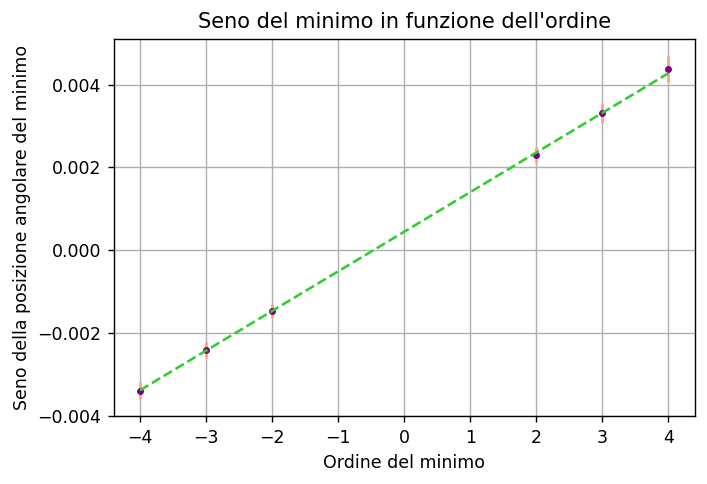

In [ ]:
ascisse_capello = [-4,-3,-2,2,3,4]

#grafico
plt.figure(dpi=125)
plt.plot(ascisse_capello, vertici_sen_capello, linestyle ="", marker=".", color="purple")
plt.errorbar(ascisse_capello, vertici_sen_capello, yerr=sigma_vertici_sen_capello, linestyle="", color="lightsalmon")
plt.xlabel("Ordine del minimo")
plt.ylabel("Seno della posizione angolare del minimo")
plt.title("Seno del minimo in funzione dell'ordine")
plt.grid()

#aggiungiamo la retta di regressione
a = 0.00044515250628925307
b = 0.0009575000134313632
plt.plot(ascisse_capello, retta_interpolante(ascisse_capello, a, b), linestyle="--", marker="", color="limegreen")
print(sigma_vertici_sen_capello)

In [ ]:
#REGRESSIONE LINEARE, PEARSON, ERRORE A POSTERIORI

import math
import sys

#dati input
x = list(ascisse_capello)
y = list(vertici_sen_capello)
sigma = list(sigma_vertici_sen_capello)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.0009575000134313632
sigma [b]
 3.008557503137706e-05
intercetta [a]
 0.00044515250628925307
sigma [a]
 8.823005576032434e-05
pearson
 0.007325111502330805
sigma pearson
 0.49998658550542097
errore posteriori
 6.196557833495811e-05


chi quadro 
 0.2223120927536756


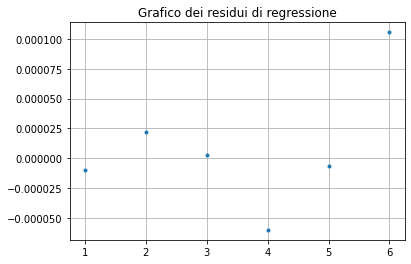

In [ ]:
#CHI QUADRO
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
y = list(vertici_sen_capello)
x = list(ascisse_capello)
sigma = list(sigma_vertici_sen_capello)
intercetta = 0.00044515250628925307
pendenza = 0.0009575000134313632
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
  dummy_2 = 0
  dummy_3 = 0
  dummy_4 = 0
  dummy_2 = y[i] - y_ref[i]
  dummy_3 = dummy_2 / sigma[i]
  dummy_4 = dummy_3**2
  vettore_scarti_quadratici.append(dummy_4)
  vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

NDOF = 4

Il chi quadro dista molto dal valore di NDOF

**Calcoliamo adesso la distanza tra le fenditure**

In [ ]:
pendenza = 0.0009575000134313632
sigma_pendenza = 3.008557503137706e-05 
num_pm = 4019
sigma_sistematico = num_pm * sigma_pm_rad

capello = lunghezza_donda / pendenza #nm
print("Diametro capello [nm] \n", capello)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_capello = math.sqrt( capello**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_capello)

Diametro capello [nm] 
 699738.8935786452
Errore 
 22601.515996361974


#Filo da pesca

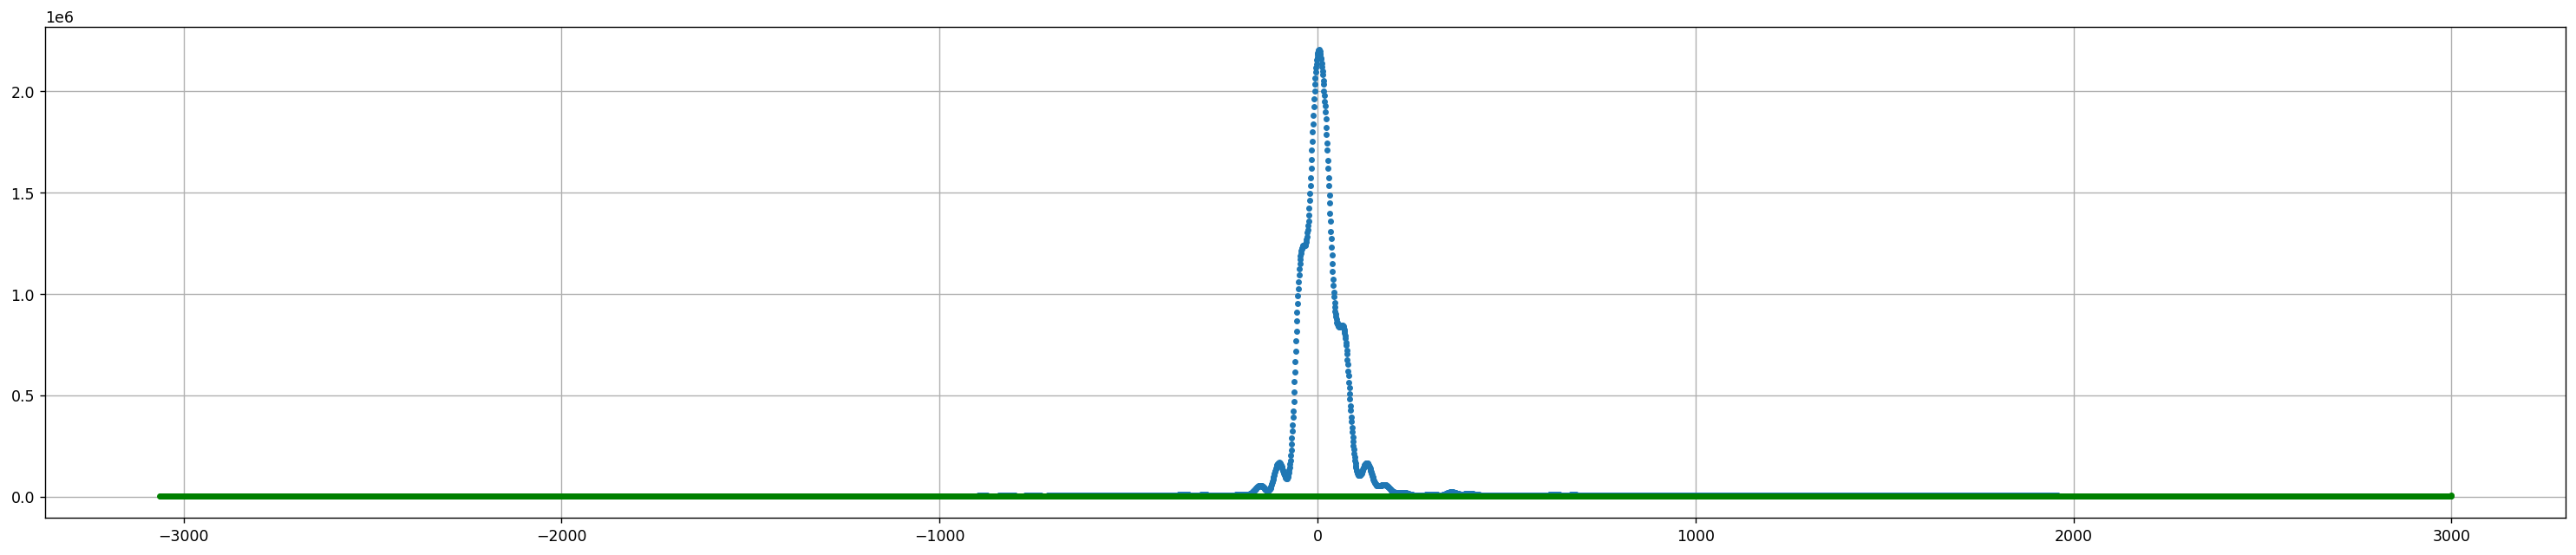

In [ ]:
#carichiamo i dati
pm_filo, int_filo = np.loadtxt("filo2.txt", delimiter=",",unpack="True")

#carichiamo il fondo
pm_fondo, int_fondo = np.loadtxt("fondolaserspento.txt", delimiter=",",unpack="True")

plt.figure(dpi=125, figsize=(30,6))
plt.plot(pm_filo, int_filo, linestyle="", marker=".")
plt.plot(pm_fondo, int_fondo, linestyle="", marker=".", color="green")
plt.grid()

Estraiamo i minimi e grafichiamoli

Text(0.5, 1.0, 'f4')

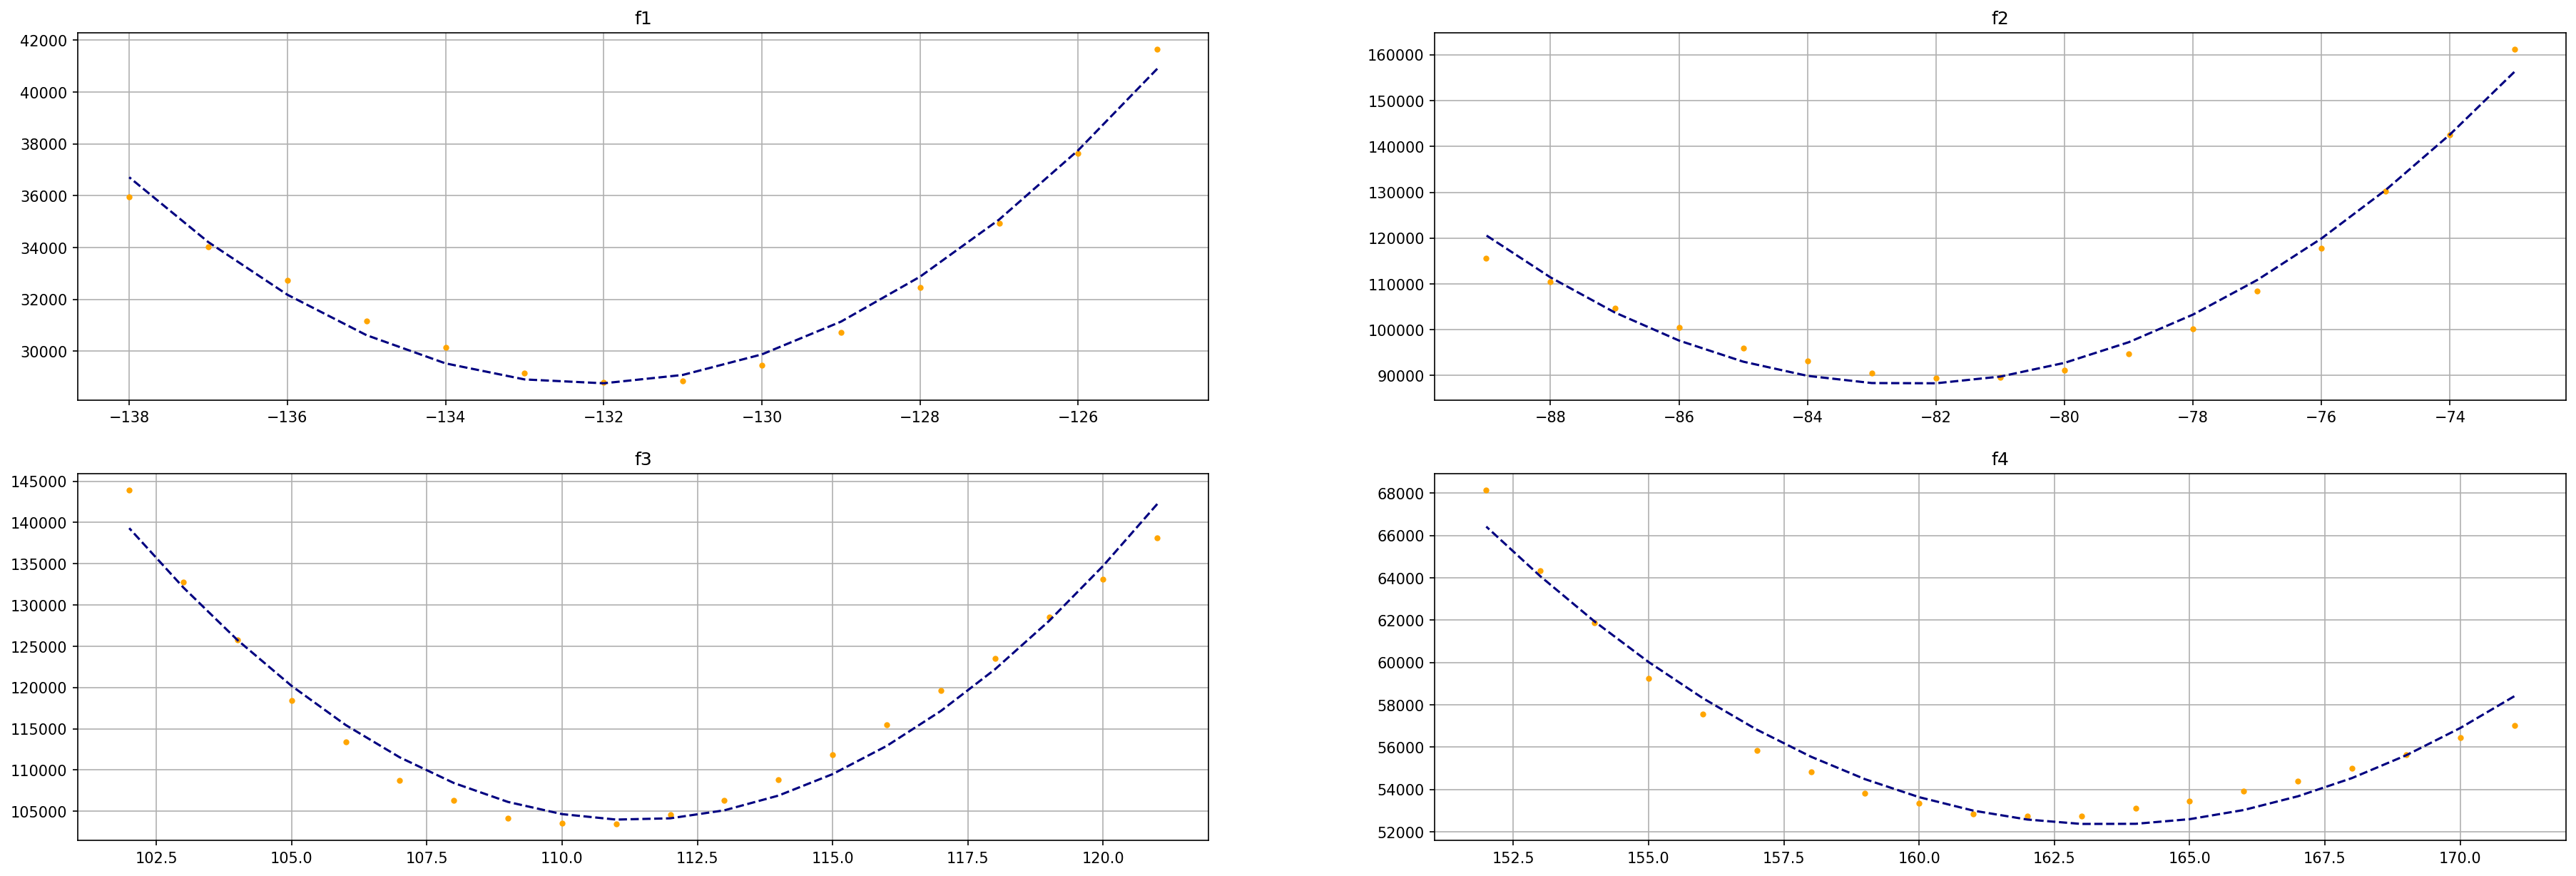

In [ ]:
plt.figure(dpi=150, figsize=(30,10))
#1   
pm_min_uno = pm_filo[2125 : 2139]
int_min_uno = int_filo[2125 : 2139]
f1 = plt.subplot(2,2,1)
f1.plot(pm_min_uno, int_min_uno, linestyle="", marker=".", color="orange")
f1.plot(pm_min_uno, parabola_fit(pm_min_uno, a1_filo, b1_filo, c1_filo), linestyle="--", marker="", color="navy")
f1.grid()
f1.set_title("f1")
#2   
pm_min_due = pm_filo[2073 : 2090]
int_min_due = int_filo[2073 : 2090]
f2 = plt.subplot(2,2,2)
f2.plot(pm_min_due, int_min_due, linestyle="", marker=".", color="orange")
f2.plot(pm_min_due, parabola_fit(pm_min_due, a2_filo, b2_filo, c2_filo), linestyle="--", marker="", color="navy")
f2.grid()
f2.set_title("f2")
#3   
pm_min_tre = pm_filo[1879 : 1899]
int_min_tre = int_filo[1879 : 1899]
f3 = plt.subplot(2,2,3)
f3.plot(pm_min_tre, int_min_tre, linestyle="", marker=".", color="orange")
f3.plot(pm_min_tre, parabola_fit(pm_min_tre, a3_filo, b3_filo, c3_filo), linestyle="--", marker="", color="navy")
f3.grid()
f3.set_title("f3")
#4   
pm_min_quattro = pm_filo[1829 : 1849]
int_min_quattro = int_filo[1829 : 1849]
f4 = plt.subplot(2,2,4)
f4.plot(pm_min_quattro, int_min_quattro, linestyle="", marker=".", color="orange")
f4.plot(pm_min_quattro, parabola_fit(pm_min_quattro, a4_filo, b4_filo, c4_filo), linestyle="--", marker="", color="navy")
f4.grid()
f4.set_title("f4")

Fit parabolico per determinare i minimi

In [ ]:
#minimo 1
par_1_filo, cov_1_filo = curve_fit(parabola_fit, pm_min_uno , int_min_uno , sigma=([sigma_1f]*len(int_min_uno)))
print("Parametri 1 a,b,c \n", par_1_filo)
print("Matrice covarianza 1 \n", cov_1_filo)
a1_filo, b1_filo, c1_filo = par_1_filo
var_a1_filo = cov_1_filo[0,0]
var_b1_filo = cov_1_filo[1,1]

#minimo 2
par_2_filo, cov_2_filo = curve_fit(parabola_fit, pm_min_due , int_min_due , sigma=([sigma_1f]*len(int_min_due)))
print("Parametri 2 a,b,c \n", par_2_filo)
print("Matrice covarianza 2 \n", cov_2_filo)
a2_filo, b2_filo, c2_filo = par_2_filo
var_a2_filo = cov_2_filo[0,0]
var_b2_filo = cov_2_filo[1,1]

#minimo 3
par_3_filo, cov_3_filo = curve_fit(parabola_fit, pm_min_tre , int_min_tre , sigma=([sigma_1f]*len(int_min_tre)))
print("Parametri 3 a,b,c \n", par_3_filo)
print("Matrice covarianza 3 \n", cov_3_filo)
a3_filo, b3_filo, c3_filo = par_3_filo
var_a3_filo = cov_3_filo[0,0]
var_b3_filo = cov_3_filo[1,1]
  
#minimo 4
par_4_filo, cov_4_filo = curve_fit(parabola_fit, pm_min_quattro , int_min_quattro , sigma=([sigma_1f]*len(int_min_quattro)))
print("Parametri 4 a,b,c \n", par_4_filo)
print("Matrice covarianza 4 \n", cov_4_filo)
a4_filo, b4_filo, c4_filo = par_4_filo
var_a4_filo = cov_4_filo[0,0]
var_b4_filo = cov_4_filo[1,1]

Parametri 1 a,b,c 
 [2.35403763e+02 6.22334556e+04 4.14190073e+06]
Matrice covarianza 1 
 [[8.81242178e+01 2.31766700e+04 1.52243407e+06]
 [2.31766700e+04 6.09659238e+06 4.00548505e+08]
 [1.52243407e+06 4.00548505e+08 2.63210965e+10]]
Parametri 2 a,b,c 
 [7.60178083e+02 1.25378300e+05 5.25788966e+06]
Matrice covarianza 2 
 [[1.03089752e+03 1.67005398e+05 6.73897706e+06]
 [1.67005398e+05 2.70744617e+07 1.09330084e+09]
 [6.73897706e+06 1.09330084e+09 4.41816734e+10]]
Parametri 3 a,b,c 
 [ 4.07714350e+02 -9.07661760e+04  5.15559714e+06]
Matrice covarianza 3 
 [[ 3.06289897e+02 -6.83026476e+04  3.79768851e+06]
 [-6.83026476e+04  1.52395765e+07 -8.47786136e+08]
 [ 3.79768851e+06 -8.47786136e+08  4.71883372e+10]]
Parametri 4 a,b,c 
 [ 1.06889464e+02 -3.49470187e+04  2.90879122e+06]
Matrice covarianza 4 
 [[ 3.80303187e+01 -1.22837933e+04  9.90651819e+05]
 [-1.22837933e+04  3.96866935e+06 -3.20142693e+08]
 [ 9.90651819e+05 -3.20142693e+08  2.58317104e+10]]


In [ ]:
#1
vertice_1_filo = vertice_parabola(b1_filo, a1_filo)
sigmav_1_filo = sigma_vertice_parabola(vertice_1_filo, b1_filo, math.sqrt(var_b1_filo), a1_filo, math.sqrt(var_a1_filo))
#2
vertice_2_filo = vertice_parabola(b2_filo, a2_filo)
sigmav_2_filo = sigma_vertice_parabola(vertice_2_filo, b2_filo, math.sqrt(var_b2_filo), a2_filo, math.sqrt(var_a2_filo))
#3
vertice_3_filo = vertice_parabola(b3_filo, a3_filo)
sigmav_3_filo = sigma_vertice_parabola(vertice_3_filo, b3_filo, math.sqrt(var_b3_filo), a3_filo, math.sqrt(var_a3_filo))
#4
vertice_4_filo = vertice_parabola(b4_filo, a4_filo)
sigmav_4_filo = sigma_vertice_parabola(vertice_4_filo, b4_filo, math.sqrt(var_b4_filo), a4_filo, math.sqrt(var_a4_filo))

#costruiamo il vettore dei vertici in passi motore
vertici_pm_filo = [vertice_1_filo,vertice_2_filo,vertice_3_filo,vertice_4_filo]
sigma_vertici_pm_filo = [sigmav_1_filo,sigmav_2_filo,sigmav_3_filo,sigmav_4_filo]

#convertiamo i pm in radianti
vertici_rad_filo = []
for i in vertici_pm_filo:
  dummy_rad = 0
  dummy_rad = i*pm_rad
  vertici_rad_filo.append(dummy_rad)
#calcoliamo il sen( ) # sin() di math
vertici_sen_filo = []
for i in vertici_rad_filo:
  dummy_sen = 0
  dummy_sen = math.sin(i)
  vertici_sen_filo.append(dummy_sen)
#calcoliamo l'errore sul sen( )
sigma_vertici_rad_filo = []
for i in sigma_vertici_pm_filo:
  dummy = 0
  dummy = i*pm_rad
  sigma_vertici_rad_filo.append(dummy)
sigma_vertici_sen_filo = []
for i in sigma_vertici_rad_filo:
  dummy = 0
  dummy = math.sqrt( (math.cos(i)*i)**2 )
  sigma_vertici_sen_filo.append(dummy)
print(vertici_sen_filo)
print(sigma_vertici_sen_filo)

[-0.0025115027861014275, -0.001566860967699429, 0.002114907236117021, 0.0031059763166847434]
[0.0002237238258563779, 0.00014746956221952737, 0.0002030755607929756, 0.00039974249504991943]


[0.0002237238258563779, 0.00014746956221952737, 0.0002030755607929756, 0.00039974249504991943]


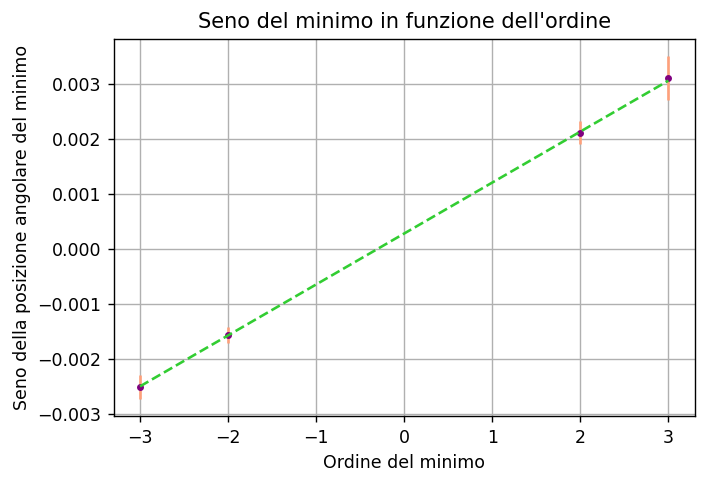

In [ ]:
ascisse_filo = [-3,-2,2,3]

#grafico
plt.figure(dpi=125)
plt.plot(ascisse_filo, vertici_sen_filo, linestyle ="", marker=".", color="purple")
plt.errorbar(ascisse_filo, vertici_sen_filo, yerr=sigma_vertici_sen_filo, linestyle="", color="lightsalmon")
plt.xlabel("Ordine del minimo")
plt.ylabel("Seno della posizione angolare del minimo")
plt.title("Seno del minimo in funzione dell'ordine")
plt.grid()

#aggiungiamo la retta di regressione
a = 0.00027902145997435956
b = 0.0009266298276203091
plt.plot(ascisse_filo, retta_interpolante(ascisse_filo, a, b), linestyle="--", marker="", color="limegreen")
print(sigma_vertici_sen_filo)

In [ ]:
#REGRESSIONE LINEARE, PEARSON, ERRORE A POSTERIORI

import math
import sys

#dati input
x = list(ascisse_filo)
y = list(vertici_sen_filo)
sigma = list(sigma_vertici_sen_filo)
dimensione = len(x)

if len(x) != len(y):
	print("X E Y DIMENSIONE DIVERSA")
	sys.exit()
if len(x) != len(sigma):
	print("X E SIGMA DIMENSIONE DIVERSA")
	sys.exit()



#REGRESSIOBNE LINEARE
#calcolo del delta
parametro_1 = 0
parametro_2 = 0
parametro_3 = 0
for i in range(dimensione): #primo termine del delta
	dummy_1 = 0
	dummy_1 = 1/ pow(sigma[i],2)
	parametro_1 = dummy_1 + parametro_1
for i in range(dimensione): #secondo termine del delta
	dummy_2 = 0
	dummy_2 = pow(x[i],2) / pow(sigma[i],2)
	parametro_2 = dummy_2 + parametro_2
dummy_3_1 = 0
for i in range(dimensione): #terzo termine del delta
	dummy_3 = 0
	dummy_3 = x[i] / pow(sigma[i],2)
	dummy_3_1 = dummy_3 + dummy_3_1
parametro_3 = pow(dummy_3_1,2)
delta = (parametro_1*parametro_2) - parametro_3
delta_1 = 1/delta

#calcolo di b
parametro_4 = 0
parametro_5 = 0
parametro_6 = 0
parametro_7 = 0

for i in range(dimensione): #calcolo del primo termine di a
	dummy_4 = 0
	dummy_4 = 1/pow(sigma[i],2)
	parametro_4 = dummy_4 + parametro_4
for i in range(dimensione): #calcolo del secondo termine di a
	dummy_5 = 0
	dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
	parametro_5 = dummy_5 + parametro_5
for i in range(dimensione): #calcolo del terzo termine di a
	dummy_6 = 0
	dummy_6 = x[i] / pow(sigma[i],2)
	parametro_6 = dummy_6 + parametro_6
for i in range(dimensione): #calcolo del quarto termine di a
	dummy_7 = 0
	dummy_7 = y[i] / pow(sigma[i],2)
	parametro_7 = dummy_7 + parametro_7

dummy_b1 = delta_1*parametro_4*parametro_5
dummy_b2 = delta_1*parametro_6*parametro_7
b = dummy_b1-dummy_b2

#calcolo di a
parametro_8 = parametro_2
parametro_9 = parametro_7
parametro_10 = parametro_6
parametro_11 = parametro_5

dummy_a1 = delta_1*parametro_8*parametro_9
dummy_a2 = delta_1*parametro_10*parametro_11
a = dummy_a1-dummy_a2

#calcolo incertezza e covarianza
#sigma b
sigma_b = math.sqrt(delta_1*parametro_1)
#sigma a
sigma_a = math.sqrt(delta_1*parametro_8)
#covrianza
#al mmento non disponibile

#COEFFICIENTE DI CORRELLAZIONE DI PEARSON
media_x = sum(x) / dimensione
media_y = sum(y) / dimensione
numeratore = 0
denominatore = 0

dummy_denx = 0
dummy_deny = 0
for i in range(dimensione):
	dummy_x = x[i]-media_x
	dummy_y = y[i]-media_y
	dummy_numeratore = dummy_x*dummy_y
	numeratore = dummy_numeratore + numeratore
	dummy_x2 = pow(dummy_x,2)
	dummy_y2 = pow(dummy_y,2)
	dummy_denx = dummy_x2 + dummy_denx
	dummy_deny = dummy_y2 + dummy_deny
dummy_denominatore = dummy_denx + dummy_deny
denominatore = math.sqrt(dummy_denominatore)
rxy = numeratore / denominatore
numeratore_sigma = 1 - pow(rxy,2)
denominatore_sigma = dimensione - 2
sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)

#ERRORE A POSTERIORI
parametro_12 = 1 / (dimensione - 2)
y_riferimento = []
for i in range(dimensione):
	dummy_y = 0
	dummy_y = a + (b*x[i])
	y_riferimento.append(dummy_y)
scarti_quadrati = 0
for i in range(dimensione):
	dummy_sq = y[i] - y_riferimento[i]
	dummy_sq2 = pow(dummy_sq,2)
	scarti_quadrati = dummy_sq2 + scarti_quadrati
errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)

#print dei risultati
print("pendenza [b]\n", b)
print("sigma [b]\n", sigma_b)
print("intercetta [a]\n", a)
print("sigma [a]\n", sigma_a)
#print("covarianza", )
print("pearson\n",  rxy)
print("sigma pearson\n", sigma_rxy)
print("errore posteriori\n",  errore_posteriori)

pendenza [b]
 0.0009266298276203091
sigma [b]
 4.752151815370621e-05
intercetta [a]
 0.00027902145997435956
sigma [a]
 0.0001100190614671787
pearson
 0.004749141113731383
sigma pearson
 0.7070988069777384
errore posteriori
 3.6636885550688185e-05


chi quadro 
 0.02594411453771109


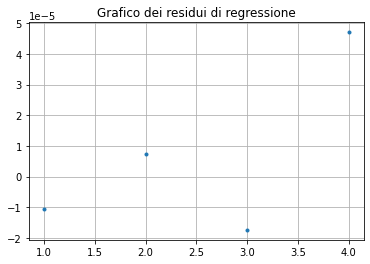

In [ ]:
#CHI QUADRO
import math
import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
y = list(vertici_sen_filo)
x = list(ascisse_filo)
sigma = list(sigma_vertici_sen_filo)
intercetta = 0.00027902145997435956
pendenza = 0.0009266298276203091
dimensione = len(y)

#calcolo del riferimento
y_ref = []
for i in x:
	dummy_1 = 0
	dummy_1 = (i*pendenza) + intercetta
	y_ref.append(dummy_1)

#calcolo del chi quadro
vettore_scarti_quadratici = []
vettore_scarti = []
for i in range(dimensione):
  dummy_2 = 0
  dummy_3 = 0
  dummy_4 = 0
  dummy_2 = y[i] - y_ref[i]
  dummy_3 = dummy_2 / sigma[i]
  dummy_4 = dummy_3**2
  vettore_scarti_quadratici.append(dummy_4)
  vettore_scarti.append(dummy_2)

chi_quadro = sum(vettore_scarti_quadratici)
print("chi quadro \n", chi_quadro)

#print del grafico degli scarti
ascisse = range(1,dimensione+1,1)

plt.plot(ascisse, vettore_scarti, marker=".", linestyle="none")
plt.title("Grafico dei residui di regressione")
plt.grid()

In [ ]:
pendenza = 0.0009266298276203091
sigma_pendenza = 4.752151815370621e-05  
num_pm = 4003
sigma_sistematico = num_pm * sigma_pm_rad

filo = lunghezza_donda / pendenza #nm
print("Diametro capello [nm] \n", filo)
#calcolo dell'errore
sigma_pendenza_corretto = math.sqrt( (sigma_pendenza)**2 + (pendenza*sigma_sistematico)**2 )
sigma_filo = math.sqrt( capello**2 * ( (sigma_lunghezza_donda/lunghezza_donda)**2 + (sigma_pendenza_corretto/pendenza)**2 ))

print("Errore \n", sigma_filo)

Diametro capello [nm] 
 723050.3271415688
Errore 
 32034.9302009243
